# ДО ИИ И ПОСЛЕ ИИ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

In [2]:
i=50000
#ДО ИИ
p0 = 1000   # штуки производство - выпуск (шт)
c0 = 900     # штуки продажи - спрос/продажи (шт)
v0 = 90    # рубли за штуку
# переменные затраты на штуку (материалы/зарплата/логистика)
r0 = 20     # рубли за штуку материалы\энергию\оборудование
s0 = 20     # рубли за штуку зарплата
l0 = 10     # рубли за штуку транспорт

q0 = 10     # рубли за интеллект - чел. капитал
m0 = 100     # рубли менеджмент
d0 = 1000     # рубли реинвестиции

# после ИИ
p1 = 1000
c1 = 1000
v1 = 100
r1 = 20
s1 = 20
q1 = 60
l1 = 10
m1 = 100
d1 = 5000

u_over = 50 # рубли за штуку перепроизводство
u_under = 10 # рубли за штуку недопроизводство

In [3]:
t = np.arange(0, 10)  # 0..9 (10 точек)

In [4]:
p0 = 1300   # штуки
c0 = 1300     # штуки

# динамика выпуска и спроса во времени
p0=p0*(1-np.exp(-t/10))*t # производсво и спрос со временем разгоняется через функцию: (1−e−t/10)⋅t
c0=c0*(1-np.exp(-t/10))*t # производсво и спрос со временем разгоняется через функцию: (1−e−t/10)⋅t
# выпуск фирмы задается как разность между выручкой и совокупными издержками, микроэкономическая модель прибыли/добавленной стоимости фирмы.
# выпуск и выручка
# p - объем производства, v - цена за единицу => p*v - общий доход от продаж
# переменные издержки на единицу продукции
# r - материальные и энергетические затраты на 1 шт.
# s - затраты на труд 1 шт
# l - логистика на 1 шт
# (r+s+l)⋅p - совокупные переменные издержки
# фиксированные и инвестиционные издержки
# q - интеллектуальный капитал
# m - менеджмент
# d - реинвестиции
# U - потери от перепроизводства/недопроизводства
# ИИ не входит в модель как отдельный фактор, а влияет на:
#↓ U - Лучше прогнозирует спрос
#↓ m - Автоматизирует управление
#↓ r, l - Оптимизация процессов
#↑ p - Повышает производительность
#↑ v - Улучшает качество
#↑ q - Рост человеческого капитала
Yb=np.where(p0>c0, p0, c0)*v0 - (r0+s0+l0)*p0 - q0 - m0 - d0 - np.where(p0>c0,(p0-c0)*u_over,(c0-p0)*u_under)
Kb=(d0 + r0*p0)
Lb=(s0*p0)
Ab =Yb/(Kb+Lb)
dlnA=np.log(Ab[5])-np.log(Ab[2])
dlnK=np.log(Kb[5])-np.log(Kb[2])
dlnL=np.log(Lb[5])-np.log(Lb[2])
dlnY=np.log(Yb[5])-np.log(Yb[2])
print('d ln A = %.2f , d ln K = %.2f, d ln L = %.2f, dln Y = %.2f'%(dlnA, dlnK, dlnL, dlnY))

d ln A = 0.09 , d ln K = 1.61, d ln L = 1.69, dln Y = 1.74


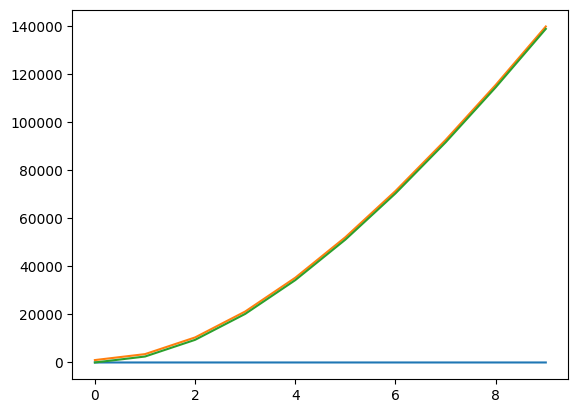

In [5]:
plt.plot(Ab)
plt.plot(Kb)
plt.plot(Lb)

In [6]:
beta = (dlnY - dlnL - dlnA)/(dlnK - dlnL)
beta

np.float64(0.5150174251157945)

In [7]:
beta = (dlnY - dlnL - dlnA)/(dlnK - dlnL)
gamma = 1-beta
alpha = 1-beta
beta, gamma

(np.float64(0.5150174251157945), np.float64(0.4849825748842055))

$ \dot K(t) = (1-a_K)^\alpha (1-a_L)^{1-\alpha} K(t) ^\alpha A(t)^{1-\alpha} L(t)^{1-\alpha} -R \cdot A(a_kK(t)+a_LL(t)) $

$ \dot A(t) = [a_K K(t)]^\beta [a_L L(t)]^\gamma A(t)^\theta $

$ \dot L(t) = a_LL(t)^\gamma $

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.008e-03 ...  7.992e+00  8.000e+00]
        y: [[ 1.000e+00  1.003e+00 ...  2.189e+01  2.187e+01]
            [ 1.000e+00  1.004e+00 ...  2.989e+01  2.995e+01]
            [ 1.000e+00  1.005e+00 ...  1.307e+01  1.309e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


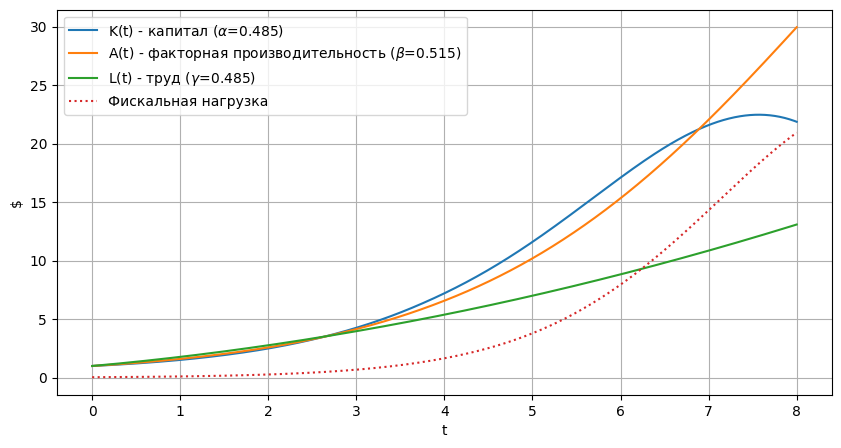

In [8]:
from scipy import integrate
from matplotlib import pyplot as plt
'''y=[K, A, L].T'''
alpha = 1-beta
theta = 0.01
ak = 0.33
al = 0.67


def f(t, y):
    return [
        ((1-ak)**alpha * (1-al)**(1-alpha)) * y[0]**alpha * (y[1]*y[2])**(1-alpha)-0.1*y[1]*(ak*y[0]+al*y[2]),
        (ak*y[0])**beta * (al*y[2])**gamma *y[1]**theta,
        al*y[2]**gamma
        ]

y_0 = [1.0, 1.0, 1.0]
t_0 = 0
t_final = 8
t_eval = np.linspace(0, t_final, 1000)

solution = integrate.solve_ivp(f, (t_0, t_final), y_0, t_eval=t_eval)
print(solution)

plt.figure(figsize=(10,5))
plt.plot(solution.t, solution.y[0], label=r'K(t) - капитал ($\alpha$=%.3f)'%alpha, c='tab:blue')
plt.plot(solution.t, solution.y[1], label=r'A(t) - факторная производительность ($\beta$=%.3f)'%beta, c='tab:orange')
plt.plot(solution.t, solution.y[2], label=r'L(t) - труд ($\gamma$=%.3f)'%gamma, c='tab:green')
plt.plot(solution.t, 0.1*solution.y[1]*(0.2*solution.y[0]+0.20*solution.y[2]), label='Фискальная нагрузка', c='tab:red', ls=':')

plt.xlabel('t')
plt.ylabel('$')
plt.legend()
plt.grid()

ДО ИИ
{'dlnA': 0.09173300863358327, 'dlnK': 1.6098408628124545, 'dlnL': 1.6913104032774857, 'dlnY': 1.7410851789554016, 'beta': 0.5150174251157945}

ПОСЛЕ ИИ
{'dlnA': 0.3934833624830882, 'dlnK': 1.3590125517138123, 'dlnL': 1.6913104032774857, 'dlnY': 1.8972627749542408, 'beta': 0.56434608266012}


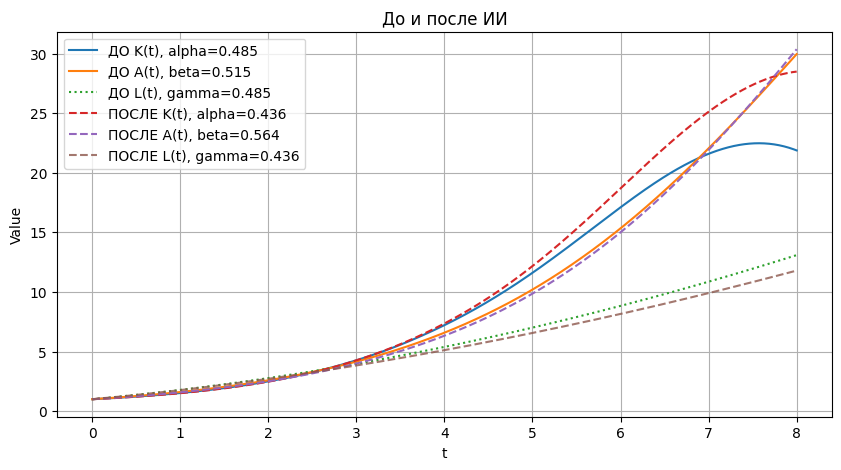


Saved: simulation_results.xlsx


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

def safe_log(x):
    x = np.asarray(x, dtype=float)
    return np.log(np.where(x > 0, x, np.nan))

def dln(x, i1, i2):
    lx = safe_log(x)
    return lx[i2] - lx[i1]

def simulate_firm(
    T=10,
    p_base=1300,
    c_base=1300,
    v=90, r=20, s=20, q=10, l=10, m=100, d=1000,
    u_over=50, u_under=10,
    tau=10.0,   # скорость (1-exp(-t/tau))
    scale_power=1.0, # насколько резко растёт выпуск со временем
):
    t = np.arange(T, dtype=float)

    # динамика p(t), c(t): (1-exp(-t/tau))*t^power
    scale = (1.0 - np.exp(-t/tau)) * (t ** scale_power)

    p = p_base * scale
    c = c_base * scale

    # штрафы за перепроизв/недопроизв
    penalty = np.where(p > c, (p - c) * u_over, (c - p) * u_under)

    # выручка: max(p,c)*v, затраты: (r+s+l)*p + q + m + d + penalty
    Y = np.where(p > c, p, c) * v - (r + s + l) * p - q - m - d - penalty

    # капитал и труд
    K = d + r * p
    L = s * p

    # производительность
    A = Y / (K + L)

    df = pd.DataFrame({
        "t": t,
        "p": p, "c": c,
        "penalty": penalty,
        "Y": Y, "K": K, "L": L, "A": A
    })
    return df

def estimate_beta(df, i1=2, i2=5):
    dlnA = dln(df["A"].values, i1, i2)
    dlnK = dln(df["K"].values, i1, i2)
    dlnL = dln(df["L"].values, i1, i2)
    dlnY = dln(df["Y"].values, i1, i2)

    beta = (dlnY - dlnL - dlnA) / (dlnK - dlnL)
    alpha = 1 - beta
    gamma = 1 - beta

    return {
        "dlnA": dlnA, "dlnK": dlnK, "dlnL": dlnL, "dlnY": dlnY,
        "beta": beta, "alpha": alpha, "gamma": gamma
    }

# Разложение роста для графика
#    dlnY = dlnA + beta*dlnK + (1-beta)*dlnL
def growth_decomposition(df, beta, i1=2, i2=5):
    dlnA = dln(df["A"].values, i1, i2)
    dlnK = dln(df["K"].values, i1, i2)
    dlnL = dln(df["L"].values, i1, i2)
    dlnY = dln(df["Y"].values, i1, i2)

    contrib_A = dlnA
    contrib_K = beta * dlnK
    contrib_L = (1 - beta) * dlnL
    approx = contrib_A + contrib_K + contrib_L
    resid = dlnY - approx

    return {
        "dlnY": dlnY,
        "A": contrib_A,
        "K": contrib_K,
        "L": contrib_L,
        "residual": resid
    }

def solve_ode(beta, alpha, gamma, theta=0.01, ak=0.33, al=0.67, t_final=8, n=1000):
    def f(t_, y):
        K, A, L = y

        # защита от отрицательных/нулевых значений
        K = max(K, 1e-9)
        A = max(A, 1e-9)
        L = max(L, 1e-9)

        dK = ((1-ak)**alpha * (1-al)**(1-alpha)) * (K**alpha) * ((A*L)**(1-alpha)) - 0.1*A*(ak*K + al*L)
        dA = (ak*K)**beta * (al*L)**gamma * (A**theta)
        dL = al*(L**gamma)
        return [dK, dA, dL]

    y0 = [1.0, 1.0, 1.0]
    t_eval = np.linspace(0, t_final, n)
    sol = integrate.solve_ivp(f, (0, t_final), y0, t_eval=t_eval)
    return sol

# до и после ИИ
base = simulate_firm(
    T=10,
    p_base=1300, c_base=1300,
    v=90, r=20, s=20, q=10, l=10, m=100, d=1000,
    u_over=50, u_under=10,
    tau=10.0, scale_power=1.0
)

ai = simulate_firm(
    T=10,
    p_base=1300, c_base=1300,
    v=100,          # лучше продажи/цена
    r=20, s=20, q=60,# выше интеллект/челкап
    l=10, m=100, d=5000,
    u_over=50, u_under=10,
    tau=10.0, scale_power=1.0
)

# Оценка beta и декомпозиция роста для каждого сценария
i1, i2 = 2, 5

est_base = estimate_beta(base, i1=i1, i2=i2)
est_ai = estimate_beta(ai, i1=i1, i2=i2)

dec_base = growth_decomposition(base, est_base["beta"], i1=i1, i2=i2)
dec_ai = growth_decomposition(ai, est_ai["beta"], i1=i1, i2=i2)

print("ДО ИИ")
print({k: float(v) for k, v in est_base.items() if k in ["dlnA","dlnK","dlnL","dlnY","beta"]})

print("\nПОСЛЕ ИИ")
print({k: float(v) for k, v in est_ai.items() if k in ["dlnA","dlnK","dlnL","dlnY","beta"]})

# ГРАФИКИ
#    7.1 уровни Y, K, L, A
def plot_compare(var, title, ylab):
    plt.figure()
    plt.plot(base["t"], base[var], label=f"BASE: {var}")
    plt.plot(ai["t"], ai[var], label=f"AI: {var}", linestyle="--")
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel(ylab)
    plt.grid(True)
    plt.legend()
    plt.show()

# Декомпозиция роста: вклад A, K, L в dlnY
def plot_decomp(dec, title):
    labels = ["A (TFP/prod.)", "K (capital)", "L (labour)", "residual"]
    values = [dec["A"], dec["K"], dec["L"], dec["residual"]]

    plt.figure()
    plt.bar(labels, values)
    plt.title(title)
    plt.ylabel("Contribution to ΔlnY")
    plt.grid(True, axis="y")
    plt.show()


sol_base = solve_ode(est_base["beta"], est_base["alpha"], est_base["gamma"])
sol_ai = solve_ode(est_ai["beta"], est_ai["alpha"], est_ai["gamma"])

plt.figure(figsize=(10,5))
plt.plot(sol_base.t, sol_base.y[0], label=f'ДО K(t), alpha={est_base["alpha"]:.3f}')
plt.plot(sol_base.t, sol_base.y[1], label=f'ДО A(t), beta={est_base["beta"]:.3f}')
plt.plot(sol_base.t, sol_base.y[2], label=f'ДО L(t), gamma={est_base["gamma"]:.3f}', linestyle=":")

plt.plot(sol_ai.t, sol_ai.y[0], label=f'ПОСЛЕ K(t), alpha={est_ai["alpha"]:.3f}', linestyle="--")
plt.plot(sol_ai.t, sol_ai.y[1], label=f'ПОСЛЕ A(t), beta={est_ai["beta"]:.3f}', linestyle="--")
plt.plot(sol_ai.t, sol_ai.y[2], label=f'ПОСЛЕ L(t), gamma={est_ai["gamma"]:.3f}', linestyle="--", alpha=0.8)

plt.title("До и после ИИ")
plt.xlabel("t")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

out = pd.ExcelWriter("simulation_results.xlsx", engine="openpyxl")
base.to_excel(out, sheet_name="ДО ИИ", index=False)
ai.to_excel(out, sheet_name="ПОСЛЕ ИИ", index=False)
pd.DataFrame([est_base, est_ai], index=["BASE", "AI"]).to_excel(out, sheet_name="params")
pd.DataFrame([dec_base, dec_ai], index=["BASE", "AI"]).to_excel(out, sheet_name="decomposition")
out.close()

print("\nSaved: simulation_results.xlsx")


=== MONTE-CARLO SUMMARY ===
               metric           mean         median           p05  \
0  ΔY_total (AI-Base)  277600.841950  271245.698340  78309.784680   
1   ΔA_mean (AI-Base)       0.110821       0.105382     -0.069742   
2     ΔΔlnY (AI-Base)       0.174604       0.163272      0.050970   
3     ΔΔlnA (AI-Base)       0.338359       0.327021      0.121530   

             p95    P(>0)      n  
0  497896.216822  0.99685  20000  
1       0.309403  0.83055  20000  
2       0.332963  0.99995  20000  
3       0.586615  1.00000  20000  


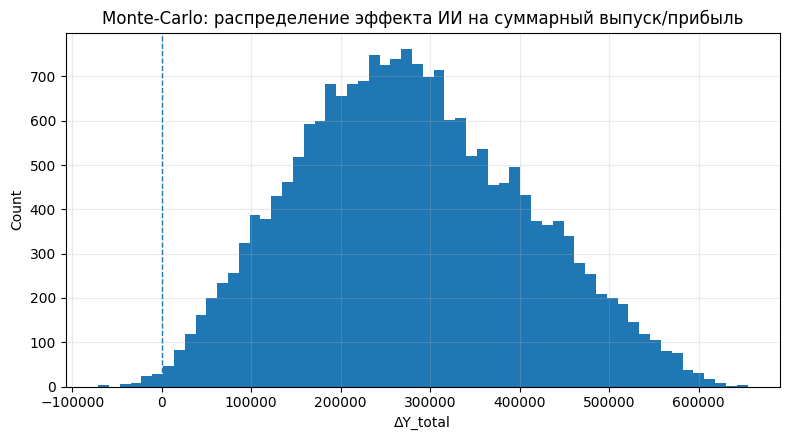

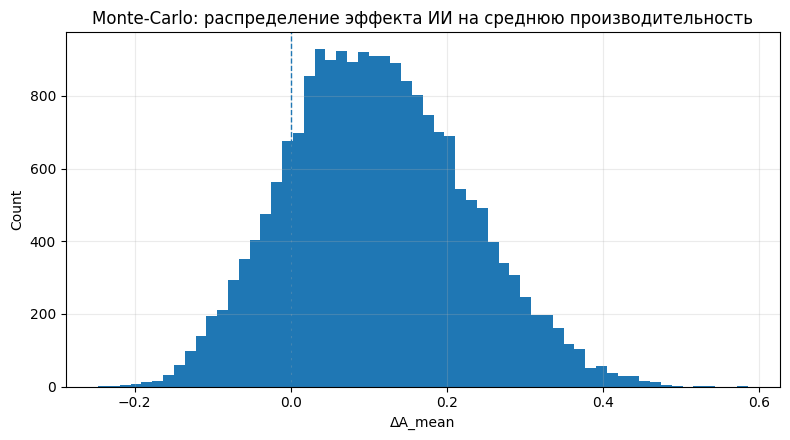

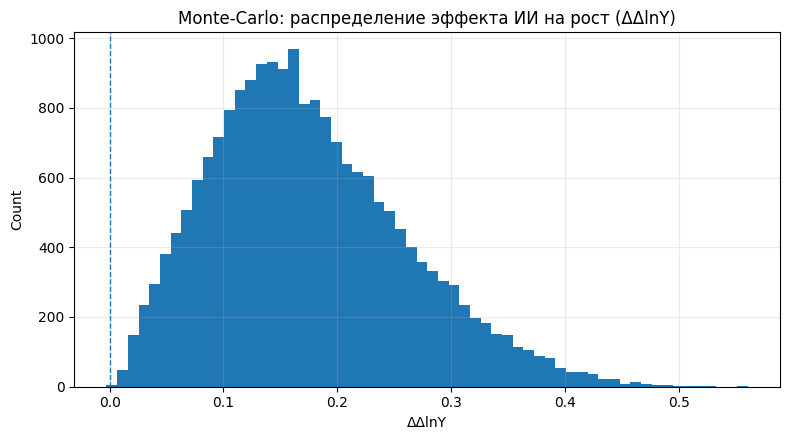

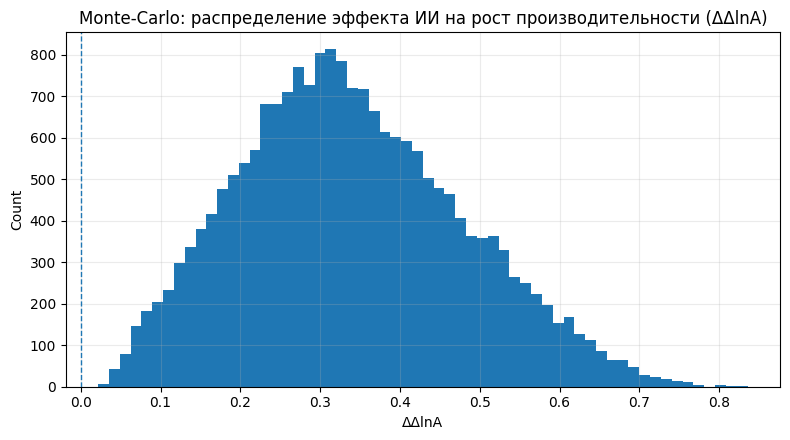


Saved: mc_simulation_results.xlsx

=== Sensitivity (corr with ΔY_total) ===
v_mult          0.969189
r_mult         -0.174717
d_mult         -0.132752
l_mult         -0.106953
u_over_mult     0.010744
q_mult         -0.009385
m_mult          0.005598
u_under_mult    0.004338
Name: dY_total, dtype: float64


In [10]:
# ============================================================
# Monte-Carlo сценарное моделирование (распределения параметров)
# Эффект ИИ -> распределение ΔY, ΔA, Δprofit + P(effect>0) + CI(5-95)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
# -------------------------

def simulate_firm_path(
    T=10,
    p_base=1300,
    c_base=1300,
    v=90, r=20, s=20, q=10, l=10, m=100, d=1000,
    u_over=50, u_under=10,
    tau=10.0,
    scale_power=1.0,
):
    """
    Возвращает траектории Y, K, L, A по времени t=0..T-1.
    Модель как у тебя: выручка - издержки - штрафы перепроизв/недопроизв.
    """
    t = np.arange(T, dtype=float)

    # динамика (можешь заменить на S-curve / logistic позже)
    scale = (1.0 - np.exp(-t / tau)) * (t ** scale_power)

    p = p_base * scale
    c = c_base * scale

    penalty = np.where(p > c, (p - c) * u_over, (c - p) * u_under)

    # выручка: max(p,c)*v
    revenue = np.where(p > c, p, c) * v
    var_costs = (r + s + l) * p

    # "прибыль/выпуск" в твоей логике
    Y = revenue - var_costs - q - m - d - penalty

    # капитал и труд
    K = d + r * p
    L = s * p

    # производительность
    A = Y / (K + L)

    return pd.DataFrame({"t": t, "p": p, "c": c, "penalty": penalty, "Y": Y, "K": K, "L": L, "A": A})


def summarize_path(df_path, i1=2, i2=5):
    """
    Агрегаты для сравнения:
    - Y_total: суммарный Y за период (можно заменить на среднее или last)
    - A_mean: средняя A за период
    - dlnY, dlnA (между i1 и i2)
    """
    Y = df_path["Y"].to_numpy(dtype=float)
    A = df_path["A"].to_numpy(dtype=float)

    # суммарный выпуск/прибыль за период
    Y_total = np.nansum(Y)

    # средняя производительность
    A_mean = np.nanmean(A)

    # лог-разности (осторожно с отрицательными Y/A -> ставим nan)
    def safe_log(x):
        x = np.asarray(x, dtype=float)
        return np.log(np.where(x > 0, x, np.nan))

    dlnY = safe_log(Y)[i2] - safe_log(Y)[i1]
    dlnA = safe_log(A)[i2] - safe_log(A)[i1]

    return {"Y_total": Y_total, "A_mean": A_mean, "dlnY": dlnY, "dlnA": dlnA}


def tri(rng, low, mode, high, size=None):
    """Triangular(low, mode, high)."""
    return rng.triangular(low, mode, high, size=size)


# -------------------------
# 2) НАСТРОЙКИ СЦЕНАРИЕВ
# -------------------------
T = 10
N = 20000          # можно 10k-50k
SEED = 42
rng = np.random.default_rng(SEED)

# БАЗОВЫЕ (до ИИ) значения (твои)
base_params_fixed = dict(
    T=T,
    p_base=1300, c_base=1300,
    v=90, r=20, s=20, q=10, l=10, m=100, d=1000,
    u_over=50, u_under=10,
    tau=10.0, scale_power=1.0,
)

# "ПОСЛЕ ИИ" как у тебя (точка), но теперь сделаем как диапазоны вокруг
# Идея: берём базу и задаём диапазоны возможных улучшений/ухудшений.
# ВАЖНО: подстрой диапазоны под твой смысл.
ai_shift_distributions = {
    # price / quality: v увеличивается
    "v_mult": ("tri", 1.00, 1.10, 1.25),        # v_after = v_before * v_mult

    # variable costs: r,l могут снижаться (эффективность)
    "r_mult": ("tri", 0.85, 0.95, 1.05),        # r_after = r_before * r_mult
    "l_mult": ("tri", 0.80, 0.95, 1.05),        # l_after = l_before * l_mult

    # management cost can decrease
    "m_mult": ("tri", 0.70, 0.90, 1.10),        # m_after = m_before * m_mult

    # human/intellectual capital spending q increases
    "q_mult": ("tri", 1.50, 4.00, 8.00),        # q_after = q_before * q_mult

    # reinvestment d increases
    "d_mult": ("tri", 1.50, 5.00, 10.00),       # d_after = d_before * d_mult

    # mismatch penalties decrease (better forecasting)
    "u_over_mult": ("tri", 0.40, 0.70, 1.00),
    "u_under_mult": ("tri", 0.40, 0.70, 1.00),
}

# Если хочешь сделать ещё неопределённость "до ИИ" (шумы в параметрах),
# можно сделать аналогичные множители и для baseline. Пока baseline фиксирован.


# -------------------------
# 3) MONTE-CARLO ПРОГОН
# -------------------------
rows = []

for i in range(N):
    # ---- baseline path
    base_path = simulate_firm_path(**base_params_fixed)
    base_sum = summarize_path(base_path, i1=2, i2=5)

    # ---- sample AI multipliers
    mult = {}
    for k, spec in ai_shift_distributions.items():
        dist, a, b, c = spec
        if dist != "tri":
            raise ValueError("В этом шаблоне используем только triangular.")
        mult[k] = float(tri(rng, a, b, c))

    # ---- apply to get AI scenario parameters
    ai_params = dict(base_params_fixed)  # start from base
    ai_params["v"] = base_params_fixed["v"] * mult["v_mult"]
    ai_params["r"] = base_params_fixed["r"] * mult["r_mult"]
    ai_params["l"] = base_params_fixed["l"] * mult["l_mult"]
    ai_params["m"] = base_params_fixed["m"] * mult["m_mult"]
    ai_params["q"] = base_params_fixed["q"] * mult["q_mult"]
    ai_params["d"] = base_params_fixed["d"] * mult["d_mult"]
    ai_params["u_over"] = base_params_fixed["u_over"] * mult["u_over_mult"]
    ai_params["u_under"] = base_params_fixed["u_under"] * mult["u_under_mult"]

    ai_path = simulate_firm_path(**ai_params)
    ai_sum = summarize_path(ai_path, i1=2, i2=5)

    # ---- effects (AI - BASE)
    dY_total = ai_sum["Y_total"] - base_sum["Y_total"]
    dA_mean = ai_sum["A_mean"] - base_sum["A_mean"]
    ddlnY = ai_sum["dlnY"] - base_sum["dlnY"]
    ddlnA = ai_sum["dlnA"] - base_sum["dlnA"]

    rows.append({
        "run": i,
        "base_Y_total": base_sum["Y_total"],
        "ai_Y_total": ai_sum["Y_total"],
        "dY_total": dY_total,

        "base_A_mean": base_sum["A_mean"],
        "ai_A_mean": ai_sum["A_mean"],
        "dA_mean": dA_mean,

        "base_dlnY": base_sum["dlnY"],
        "ai_dlnY": ai_sum["dlnY"],
        "ddlnY": ddlnY,

        "base_dlnA": base_sum["dlnA"],
        "ai_dlnA": ai_sum["dlnA"],
        "ddlnA": ddlnA,

        # сохраняем ключевые множители, чтобы потом делать sensitivity
        **mult
    })

mc = pd.DataFrame(rows)

# -------------------------
# 4) ИТОГОВЫЕ МЕТРИКИ
# -------------------------
def summarize_effect(series: pd.Series, name: str):
    s = series.dropna()
    return {
        "metric": name,
        "mean": float(s.mean()),
        "median": float(s.median()),
        "p05": float(s.quantile(0.05)),
        "p95": float(s.quantile(0.95)),
        "P(>0)": float((s > 0).mean()),
        "n": int(s.shape[0])
    }

summary = pd.DataFrame([
    summarize_effect(mc["dY_total"], "ΔY_total (AI-Base)"),
    summarize_effect(mc["dA_mean"], "ΔA_mean (AI-Base)"),
    summarize_effect(mc["ddlnY"], "ΔΔlnY (AI-Base)"),
    summarize_effect(mc["ddlnA"], "ΔΔlnA (AI-Base)"),
])

print("\n=== MONTE-CARLO SUMMARY ===")
print(summary)

# -------------------------
# 5) ГРАФИКИ РАСПРЕДЕЛЕНИЙ
# -------------------------
def plot_hist(x, title, xlabel):
    x = x.dropna().to_numpy()
    plt.figure(figsize=(8,4.5))
    plt.hist(x, bins=60)
    plt.axvline(0, linestyle="--", linewidth=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

plot_hist(mc["dY_total"], "Monte-Carlo: распределение эффекта ИИ на суммарный выпуск/прибыль", "ΔY_total")
plot_hist(mc["dA_mean"], "Monte-Carlo: распределение эффекта ИИ на среднюю производительность", "ΔA_mean")
plot_hist(mc["ddlnY"], "Monte-Carlo: распределение эффекта ИИ на рост (ΔΔlnY)", "ΔΔlnY")
plot_hist(mc["ddlnA"], "Monte-Carlo: распределение эффекта ИИ на рост производительности (ΔΔlnA)", "ΔΔlnA")

# -------------------------
# 6) СОХРАНЕНИЕ В EXCEL
# -------------------------
out_path = "mc_simulation_results.xlsx"
with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
    summary.to_excel(writer, sheet_name="summary", index=False)
    mc.to_excel(writer, sheet_name="raw_mc", index=False)

print(f"\nSaved: {out_path}")

# -------------------------
# 7) (ОПЦИОНАЛЬНО) БЫСТРАЯ ЧУВСТВИТЕЛЬНОСТЬ:
# корреляция эффекта ΔY_total с параметрами (множителями)
# -------------------------
sens_cols = ["v_mult","r_mult","l_mult","m_mult","q_mult","d_mult","u_over_mult","u_under_mult"]
sens = mc[["dY_total"] + sens_cols].corr(numeric_only=True)["dY_total"].drop("dY_total").sort_values(key=lambda s: s.abs(), ascending=False)

print("\n=== Sensitivity (corr with ΔY_total) ===")
print(sens)

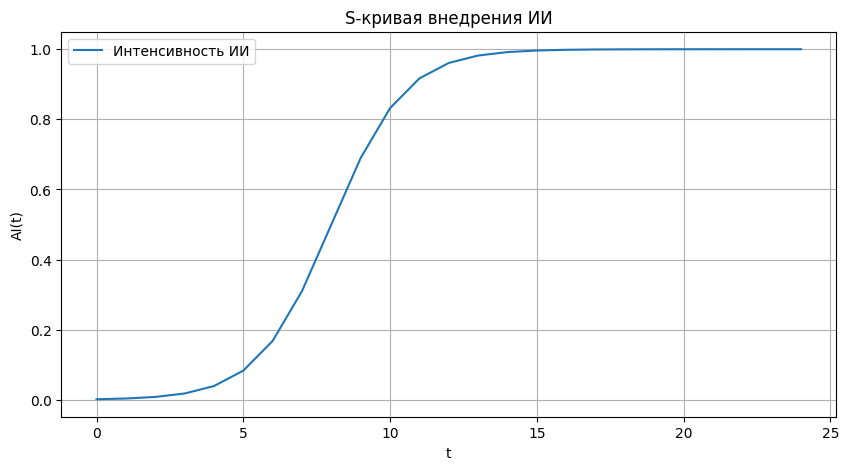

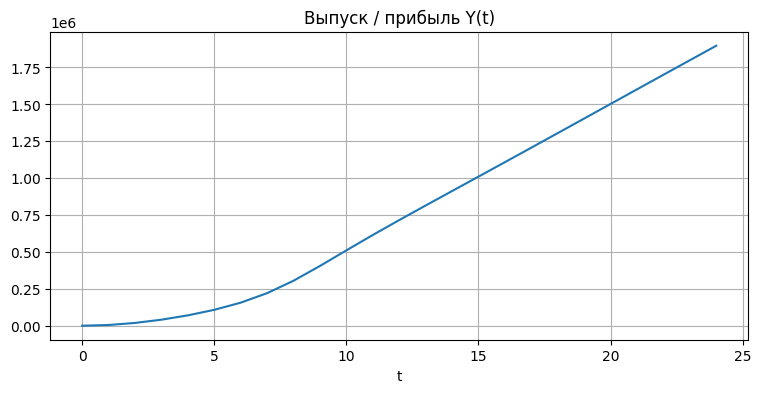

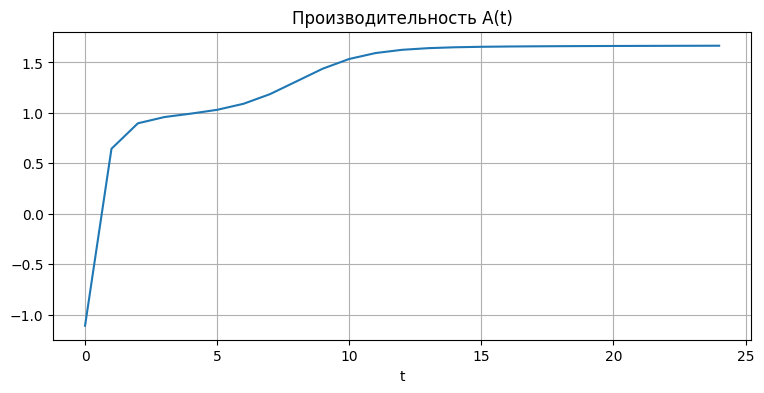

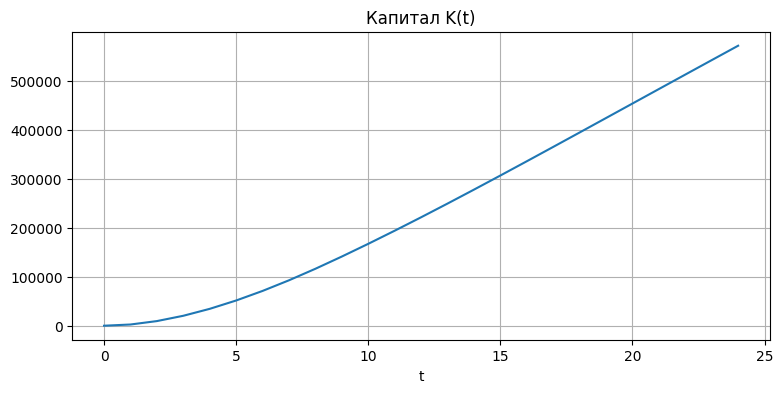

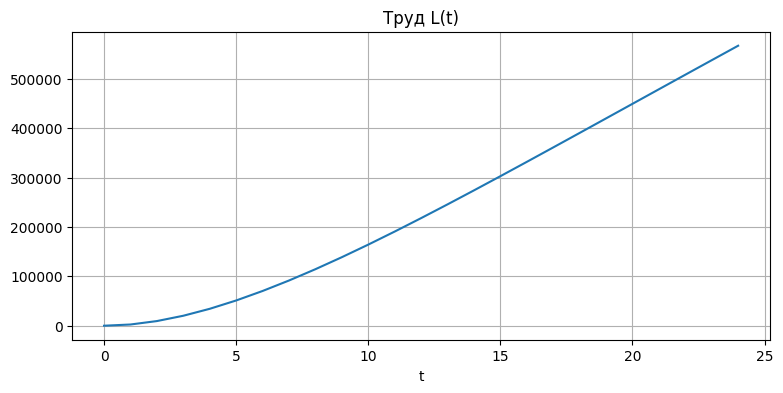

In [11]:
def AI_intensity(t, k=1.0, t0=5.0):
    """
    Логистическая S-кривая:
    AI(t) = 1 / (1 + exp(-k*(t - t0)))
    """
    return 1.0 / (1.0 + np.exp(-k * (t - t0)))
def simulate_firm_with_AI_transition(
    T=20,
    p_base=1300,
    c_base=1300,
    v0=90, r0=20, s0=20, q0=10, l0=10, m0=100, d0=1000,
    u_over0=50, u_under0=10,

    # эффекты ИИ (эластичности)
    lam=0.6,   # ↓ штрафы
    mu=0.5,    # ↓ менеджмент
    nu=0.3,    # ↑ цена / качество
    eta=2.0,   # ↑ человеческий капитал
    delta=3.0, # ↑ инвестиции

    # параметры S-кривой
    k=0.8,
    t0=8,

    tau=10.0,
    scale_power=1.0
):
    t = np.arange(T, dtype=float)

    AI = AI_intensity(t, k=k, t0=t0)

    # Плавно меняющиеся параметры
    v = v0 * (1 + nu * AI)
    q = q0 * (1 + eta * AI)
    m = m0 * (1 - mu * AI)
    d = d0 * (1 + delta * AI)
    u_under = u_under0 * (1 - lam * AI)
    u_over  = u_over0  * (1 - lam * AI)

    # динамика производства
    scale = (1.0 - np.exp(-t / tau)) * (t ** scale_power)
    p = p_base * scale
    c = c_base * scale

    penalty = np.where(p > c, (p - c) * u_over, (c - p) * u_under)

    revenue = np.where(p > c, p, c) * v
    var_costs = (r0 + s0 + l0) * p

    Y = revenue - var_costs - q - m - d - penalty
    K = d + r0 * p
    L = s0 * p
    A = Y / (K + L)

    df = pd.DataFrame({
        "t": t,
        "AI_intensity": AI,
        "Y": Y,
        "K": K,
        "L": L,
        "A": A,
        "v": v,
        "q": q,
        "m": m,
        "d": d,
        "u_under": u_under,
        "u_over": u_over,
        "penalty": penalty
    })

    return df
df = simulate_firm_with_AI_transition(T=25)

plt.figure(figsize=(10,5))
plt.plot(df["t"], df["AI_intensity"], label="Интенсивность ИИ")
plt.xlabel("t")
plt.ylabel("AI(t)")
plt.title("S-кривая внедрения ИИ")
plt.grid()
plt.legend()
plt.show()
def plot_var(df, var, title):
    plt.figure(figsize=(9,4))
    plt.plot(df["t"], df[var])
    plt.title(title)
    plt.xlabel("t")
    plt.grid()
    plt.show()

plot_var(df, "Y", "Выпуск / прибыль Y(t)")
plot_var(df, "A", "Производительность A(t)")
plot_var(df, "K", "Капитал K(t)")
plot_var(df, "L", "Труд L(t)")

                                 Scenario        Mean ΔY        Sum ΔY  \
0                           Base (без ИИ)       0.000000  0.000000e+00   
1     ИИ: оптимизация управления (↓m, ↓u)      26.397835  6.599459e+02   
2  ИИ: повышение качества/спроса (↑v, ↑c)  418672.492111  1.046681e+07   
3                        ИИ: полный пакет  472889.461453  1.182224e+07   

    Mean ΔA  NPV (ΔY discounted)  Payback (period)  
0  0.000000         0.000000e+00                 0  
1  0.000056         1.597567e+02                 0  
2  0.614576         2.021377e+06                 0  
3  0.792416         2.280619e+06                 1  


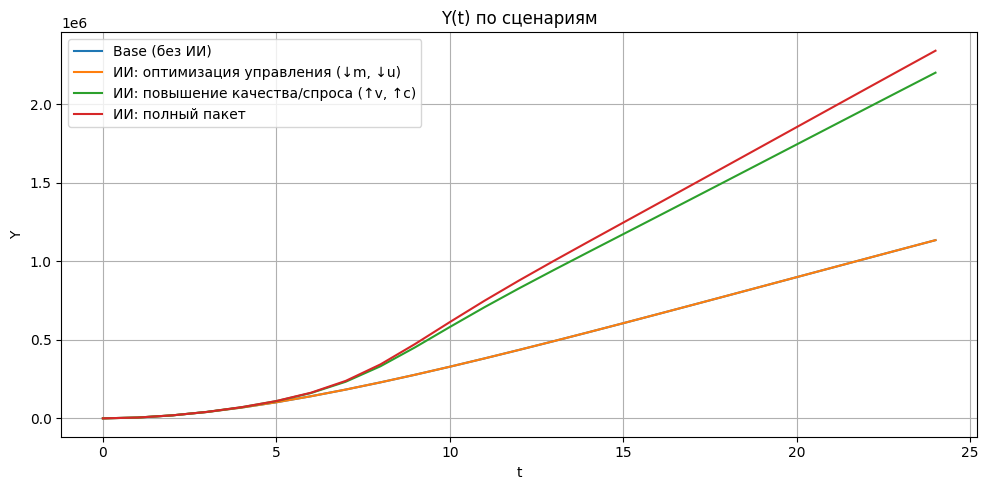

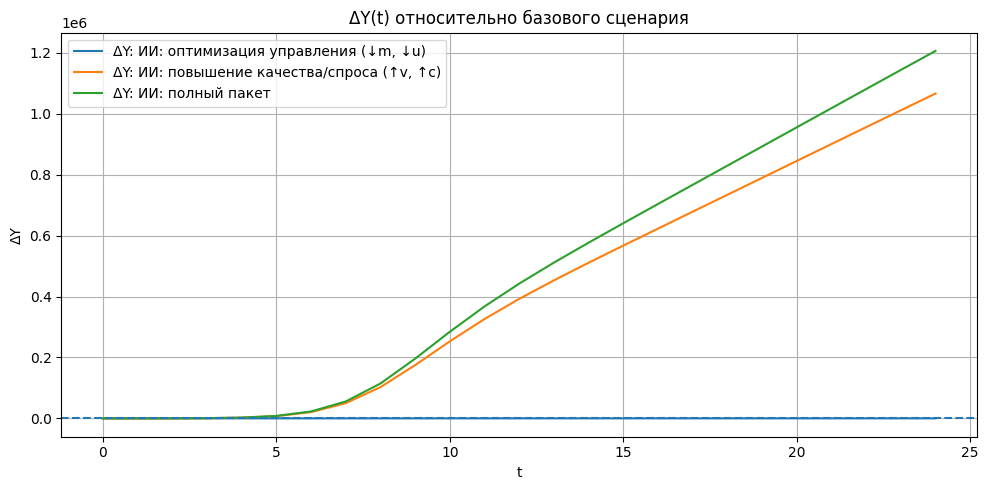

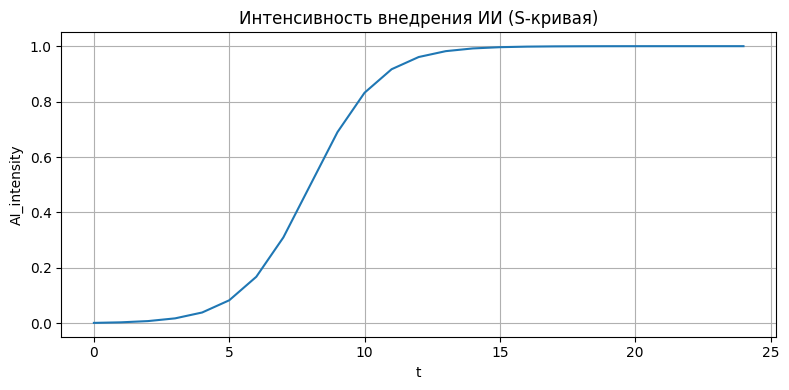


Saved: scenario_matrix_results.xlsx


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) S-curve: интенсивность ИИ
# -----------------------------
def AI_intensity(t, k=0.8, t0=8.0):
    return 1.0 / (1.0 + np.exp(-k * (t - t0)))

# -----------------------------
# 2) Симуляция фирмы с плавным внедрением ИИ
# -----------------------------
def simulate_firm_AI(
    T=25,
    # базовые уровни (без ИИ)
    p_base=1300,
    c_base=1300,
    v0=90, r0=20, s0=20, q0=10, l0=10, m0=100, d0=1000,
    u_over0=50, u_under0=10,

    # динамика масштаба
    tau=10.0,
    scale_power=1.0,

    # S-curve
    k=0.8,
    t0=8.0,

    # эффекты ИИ (эластичности / коэффициенты)
    # (если =0 => ИИ не меняет параметр)
    lam_u=0.0,   # ↓ штрафы u_over/u_under
    mu_m=0.0,    # ↓ менеджмент m
    nu_v=0.0,    # ↑ цена/качество v
    xi_c=0.0,    # ↑ спрос/продажи c (качество/маркетинг/прогноз)
    eta_q=0.0,   # ↑ человеческий капитал q (расходы/инвестиции в ИИ)
    rho_r=0.0,   # ↓ материалы/энергия r
    rho_l=0.0,   # ↓ логистика l
    delta_d=0.0  # ↑/↓ инвестиции d (капвложения под ИИ)
):
    t = np.arange(T, dtype=float)
    AI = AI_intensity(t, k=k, t0=t0)

    # Плавные изменения параметров под ИИ
    v = v0 * (1 + nu_v * AI)
    # рост "эффективного спроса"/продаж: c(t) увеличивается с ИИ
    c_mult = (1 + xi_c * AI)

    m = m0 * (1 - mu_m * AI)
    u_under = u_under0 * (1 - lam_u * AI)
    u_over  = u_over0  * (1 - lam_u * AI)

    # ИИ как рост затрат на челкап / компетенции (можно трактовать как инвестиции в ИИ)
    q = q0 * (1 + eta_q * AI)

    # оптимизация затрат
    r = r0 * (1 - rho_r * AI)
    l = l0 * (1 - rho_l * AI)

    # капвложения/инвестиции (например покупка ИИ-систем)
    d = d0 * (1 + delta_d * AI)

    # динамика выпуска и базового спроса
    scale = (1.0 - np.exp(-t / tau)) * (t ** scale_power)
    p = p_base * scale
    c = (c_base * scale) * c_mult

    # штрафы за перепроизв/недопроизв
    penalty = np.where(p > c, (p - c) * u_over, (c - p) * u_under)

    # Выручка и издержки
    revenue = np.where(p > c, p, c) * v
    var_costs = (r + s0 + l) * p

    # "выпуск/прибыль" (как у тебя): Y = revenue - costs - (q+m+d) - penalty
    Y = revenue - var_costs - q - m - d - penalty

    K = d + r * p
    L = s0 * p
    A = Y / (K + L)

    return pd.DataFrame({
        "t": t,
        "AI_intensity": AI,
        "p": p,
        "c": c,
        "v": v,
        "r": r,
        "l": l,
        "m": m,
        "q": q,
        "d": d,
        "penalty": penalty,
        "Y": Y,
        "K": K,
        "L": L,
        "A": A
    })

# -----------------------------
# 3) Финансовые метрики: NPV и payback
# -----------------------------
def discounted(series, discount_rate):
    # t=0..T-1
    t = np.arange(len(series), dtype=float)
    return series / ((1 + discount_rate) ** t)

def calc_npv_and_payback(deltaY, discount_rate=0.10):
    dY_disc = discounted(deltaY, discount_rate)
    cum = np.cumsum(dY_disc)
    npv = float(cum[-1])

    # Payback: первый период, когда накопленный диск. эффект >= 0
    payback_idx = np.where(cum >= 0)[0]
    payback = int(payback_idx[0]) if len(payback_idx) > 0 else None
    return npv, payback

# -----------------------------
# 4) Матрица сценариев (4 штуки)
# -----------------------------
def run_scenario_matrix(
    T=25,
    discount_rate=0.10,
    # S-curve настройки (если хочешь одинаковые для всех)
    k=0.8,
    t0=8.0
):
    # БАЗА (без ИИ)
    base = simulate_firm_AI(T=T, k=k, t0=t0)

    scenarios = {
        "Base (без ИИ)": dict(
            lam_u=0.0, mu_m=0.0, nu_v=0.0, xi_c=0.0, eta_q=0.0, rho_r=0.0, rho_l=0.0, delta_d=0.0
        ),

        "ИИ: оптимизация управления (↓m, ↓u)": dict(
            mu_m=0.40,   # управление дешевле на 40% * AI(t)
            lam_u=0.50   # штрафы меньше на 50% * AI(t)
        ),

        "ИИ: повышение качества/спроса (↑v, ↑c)": dict(
            nu_v=0.20,   # цена/качество +20% * AI(t)
            xi_c=0.20    # спрос/продажи +20% * AI(t)
        ),

        "ИИ: полный пакет": dict(
            mu_m=0.40,   # ↓m
            lam_u=0.50,  # ↓u
            nu_v=0.20,   # ↑v
            xi_c=0.20,   # ↑c
            eta_q=1.50,  # ↑q (расходы на челкап/ИИ)
            rho_r=0.15,  # ↓r
            rho_l=0.10,  # ↓l
            delta_d=2.00 # ↑d (капвложения под ИИ)
        )
    }

    results = []
    paths = {"Base (без ИИ)": base}

    for name, params in scenarios.items():
        df_s = simulate_firm_AI(T=T, k=k, t0=t0, **params)
        paths[name] = df_s

        # Инкремент относительно базы
        deltaY = (df_s["Y"].values - base["Y"].values)
        deltaA = (df_s["A"].values - base["A"].values)

        npv, payback = calc_npv_and_payback(deltaY, discount_rate=discount_rate)

        results.append({
            "Scenario": name,
            "Mean ΔY": float(np.nanmean(deltaY)),
            "Sum ΔY": float(np.nansum(deltaY)),
            "Mean ΔA": float(np.nanmean(deltaA)),
            "NPV (ΔY discounted)": float(npv),
            "Payback (period)": payback
        })

    res_table = pd.DataFrame(results).sort_values("Scenario").reset_index(drop=True)
    return res_table, paths

# -----------------------------
# 5) Запуск + таблица + графики
# -----------------------------
res_table, paths = run_scenario_matrix(T=25, discount_rate=0.10, k=0.8, t0=8.0)

print(res_table)

# Таблица в Excel (для слайдов удобно)
res_table.to_excel("scenario_matrix_results.xlsx", index=False)

# График траекторий Y(t) по сценариям
plt.figure(figsize=(10,5))
for name, df_s in paths.items():
    plt.plot(df_s["t"], df_s["Y"], label=name)
plt.title("Y(t) по сценариям")
plt.xlabel("t")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# График ΔY(t) относительно базы
base = paths["Base (без ИИ)"]
plt.figure(figsize=(10,5))
for name, df_s in paths.items():
    if name == "Base (без ИИ)":
        continue
    dY = df_s["Y"].values - base["Y"].values
    plt.plot(df_s["t"], dY, label=f"ΔY: {name}")
plt.axhline(0, linestyle="--")
plt.title("ΔY(t) относительно базового сценария")
plt.xlabel("t")
plt.ylabel("ΔY")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# График интенсивности AI(t) (один раз)
any_df = next(iter(paths.values()))
plt.figure(figsize=(8,4))
plt.plot(any_df["t"], any_df["AI_intensity"])
plt.title("Интенсивность внедрения ИИ (S-кривая)")
plt.xlabel("t")
plt.ylabel("AI_intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nSaved: scenario_matrix_results.xlsx")


# **ARDL - модель по России**

Research - R&D расходы (% ВВП)

GDP - ВВП на занятого (PPP, 2021$)

publication	AI - публикации

unemp	- безработица

invest - инвестиции

advanced - передовые технологии

educ - госрасходы на образование (% ВВП)

comp - доля организаций с ПК

internet - доля организаций с интернетом

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ardl import ARDL, ardl_select_order
from statsmodels.tsa.stattools import adfuller

# 1) Загрузка и подготовка данных
FILEPATH = "Russia_1.xlsx"
df = pd.read_excel(FILEPATH)
df.columns = [str(c).strip() for c in df.columns]

YEAR = "year"
YCOL = "GDP"
RD   = "Research"
PUB  = "publication"
UNEMP= "unemp"
INV  = "invest"
ADV  = "advanced"
EDU  = "educ"
COMP = "comp"
INET = "internet"

need_cols = [YEAR, YCOL, RD, PUB, UNEMP, INV, ADV, EDU, COMP, INET]
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"В файле нет колонок: {missing}")

df = df[need_cols].copy().sort_values(YEAR)

# привести к числам
for c in [YCOL, RD, PUB, UNEMP, INV, ADV, EDU, COMP, INET]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna().reset_index(drop=True)

# 2) переменные
# логи
df["ln_y"]   = np.log(df[YCOL])
df["ln_inv"] = np.log(df[INV])
df["ln_adv"] = np.log1p(df[ADV])

# 3) AI_index_eqw (equal-weight)
ai_components = [PUB, "ln_adv", COMP, INET]

for c in ai_components:
    s = df[c].astype(float)
    std = s.std(ddof=0)
    if std == 0 or np.isnan(std):
        raise ValueError(f"Нулевая/неопределённая дисперсия у компоненты индекса: {c}")
    df[f"z_{c}"] = (s - s.mean()) / std

df["AI_index_eqw"] = df[[f"z_{c}" for c in ai_components]].mean(axis=1)

# 4) ADF тесты
def adf_report(series: pd.Series, name: str):
    series = series.dropna()
    stat, p, *_ = adfuller(series, autolag="AIC")
    print(f"ADF {name}: stat={stat:.3f}, p={p:.4f}")

print("\nADF")
adf_report(df["ln_y"], "ln_y")
adf_report(df["AI_index_eqw"], "AI_index_eqw")
adf_report(df[RD], "Research")
adf_report(df["ln_inv"], "ln_inv")
adf_report(df[EDU], "educ")
adf_report(df[UNEMP], "unemp")

# 5) ARDL со всеми переменными (фиксируем структуру)
#    ARDL(1,1,1,1,1,1): 1 лаг y и по 1 лагу для всех X
y = df["ln_y"]
X = df[["AI_index_eqw", RD, "ln_inv", EDU, UNEMP]]

ardl_model = ARDL(
    endog=y,
    lags=1,      # лаг зависимой
    exog=X,
    order=1,     # лаги всех регрессоров
    trend="c"    # константа
)

ardl_res = ardl_model.fit()

print("\n=== ARDL(1,1,1,1,1,1) со всеми переменными ===")
print(ardl_res.summary())

# 6) UECM (ECM) вручную
#    Δln_y_t = const + ψΔln_y_{t-1} + γ'ΔX_t + φ ln_y_{t-1} + θ'X_{t-1} + e_t
d = df.copy()

# разности (short-run)
d["d_ln_y"]   = d["ln_y"].diff()
d["d_AI"]     = d["AI_index_eqw"].diff()
d["d_RD"]     = d[RD].diff()
d["d_ln_inv"] = d["ln_inv"].diff()
d["d_educ"]   = d[EDU].diff()
d["d_unemp"]  = d[UNEMP].diff()

# лаги уровней (long-run)
d["ln_y_L1"]    = d["ln_y"].shift(1)
d["AI_L1"]      = d["AI_index_eqw"].shift(1)
d["RD_L1"]      = d[RD].shift(1)
d["ln_inv_L1"]  = d["ln_inv"].shift(1)
d["educ_L1"]    = d[EDU].shift(1)
d["unemp_L1"]   = d[UNEMP].shift(1)

# лаг разности зависимой (инерция short-run)
d["d_ln_y_L1"] = d["d_ln_y"].shift(1)

uecm = d.dropna().copy()

Y_uecm = uecm["d_ln_y"]
X_uecm = uecm[[
    "d_ln_y_L1",
    "d_AI","d_RD","d_ln_inv","d_educ","d_unemp",
    "ln_y_L1","AI_L1","RD_L1","ln_inv_L1","educ_L1","unemp_L1"
]]

X_uecm = sm.add_constant(X_uecm)
uecm_res = sm.OLS(Y_uecm, X_uecm).fit()

print("\n UECM results ===")
print(uecm_res.summary())

# 7) Долгосрочные эффекты (из UECM): LR = -theta/phi
phi = float(uecm_res.params["ln_y_L1"])

print("\n=== Долгосрочные эффекты (на основе UECM) ===")
for var, name in [
    ("AI_L1", "AI_index_eqw"),
    ("RD_L1", "Research"),
    ("ln_inv_L1", "ln_inv"),
    ("educ_L1", "educ"),
    ("unemp_L1", "unemp")
]:
    theta = float(uecm_res.params[var])
    lr = -theta / phi
    print(f"{name:14s}: {lr: .4f}")

print("\nСкорость корректировки (ECT, φ):", phi)
print("Интерпретация: φ < 0 => возврат к долгосрочному равновесию (желательно, чтобы φ была значима).")


ADF
ADF ln_y: stat=2.048, p=0.9987
ADF AI_index_eqw: stat=-1.153, p=0.6935
ADF Research: stat=-2.066, p=0.2583
ADF ln_inv: stat=1.431, p=0.9972
ADF educ: stat=0.590, p=0.9874
ADF unemp: stat=-0.561, p=0.8795

=== ARDL(1,1,1,1,1,1) со всеми переменными ===
                                ARDL Model Results                                
Dep. Variable:                       ln_y   No. Observations:                   20
Model:             ARDL(1, 1, 1, 1, 1, 1)   Log Likelihood                  58.860
Method:                   Conditional MLE   S.D. of innovations              0.011
Date:                    Tue, 20 Jan 2026   AIC                            -91.720
Time:                            17:11:25   BIC                            -79.443
Sample:                                 1   HQIC                           -89.642
                                       20                                         
                      coef    std err          z      P>|z|      [0.025      0.

Вывод по модели ARDL–ECM

Результаты ARDL-моделирования и модели коррекции ошибок (ECM) свидетельствуют о наличии устойчивой долгосрочной связи между производительностью труда в Российской Федерации и показателями технологического развития, инвестиций и человеческого капитала.

Оценка ECM показала, что коэффициент корректировки (ECT) является отрицательным и достаточно высоким по модулю (−0.87), что указывает на быструю скорость возврата системы к долгосрочному равновесию: около 87% дисбаланса устраняется в течение одного года.

В краткосрочной перспективе статистически значимые эффекты не выявлены, что подтверждает гипотезу о том, что влияние цифровизации, инвестиций и научно-технологического развития проявляется с временным лагом.

В долгосрочной перспективе наиболее существенное положительное влияние на производительность труда оказывают инвестиции в основной капитал и расходы на исследования и разработки. Композитный индекс цифровизации и ИИ также демонстрирует положительный, хотя и слабый эффект, что может отражать раннюю стадию внедрения данных технологий в экономике РФ.

В целом, полученные результаты подтверждают, что технологическое развитие и цифровизация являются важными, но долгосрочными факторами роста производительности, а не источниками мгновенного эффекта.

# КЛАСТЕРИЗАЦИЯ РЕГИОНОВ



*1) personal - Численность персонала, занятого научными исследованиями и разработками*

*2) pc_usage_share - Удельный вес организаций, использовавших персональные компьютеры*

*3) advanced_technologies - Используемые передовые производственные технологии по субъектам РФ*

*4) higher_education_share - Доля занятого населения в возрасте 25-64 лет, имеющего высшее образование*

*5) unemp - Уровень безработицы населения в возрасте 15-72 лет по субъектам РФ*

*6) employment - Численность занятых в возрасте 15-72 лет по субъектам РФ, тыс. чел.*

*7) internet_usage_share - Удельный вес организаций, использовавших Интернет, по субъектам РФ*

*8) LP - Производительность труда региона, руб. на занятого*

*9) expenditure - Внутренние затраты на научные исследования и разработки по субъектам РФ*

*10) investment - инвестиции в основной капитал*

*11) capital - Затраты на приобретение оборудования, млн. руб.*

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [15]:
df = pd.read_excel('/content/NIRR.xlsx')
df

,region,year,personal,pc_usage_share,advanced_technologies,higher_education_share,unemp,employment,internet_usage_share,LP,expenditure,investment,capital,Y
0,Белгородская область,2015,1749,97.5,1970,30.8,4.1,773.8,93.3,896070.56,1921.10,147214.00,150.800000,693379.4
1,Брянская область,2015,805,96.1,1456,28.0,4.7,594.9,91.8,456854.09,547.80,6.23,3.100000,271782.5
2,Владимирская область,2015,5697,96.1,3892,27.1,5.6,721.9,93.1,510443.55,3767.10,7.15,15.200000,368489.2
3,Воронежская область,2015,10600,95.6,2160,31.9,4.5,1113.6,91.4,723751.44,6379.80,26.47,222.700000,805969.6
4,Ивановская область,2015,634,96.3,935,28.6,5.6,511.6,91.4,352848.91,712.80,2.57,52.300000,180517.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Приморский край,2023,5431,78.5,1426,31.0,2.6,959.4,78.5,1292091.61,6731.58,26.87,20.495076,1862934.3
743,Хабаровский край,2023,1497,79.5,2082,33.9,2.1,693.2,79.4,1242330.83,1722.14,30.13,32.471519,1262368.1
744,Амурская область,2023,614,82.0,717,26.2,2.4,399.4,82.0,1288334.93,631.01,48.32,70.197044,793851.9
745,Магаданская область,2023,464,83.5,442,37.8,3.4,78.0,83.5,3461744.45,610.04,6.02,3.008424,403892.8


Проведем дискриптивный анализ

In [16]:
df.describe()

,year,personal,pc_usage_share,higher_education_share,unemp,employment,internet_usage_share,LP,expenditure,investment,capital,Y
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02,747.000000,747.000000,747.000000,7.470000e+02
mean,2019.000000,8339.452477,87.740964,33.165194,5.962249,886.017403,84.939224,1.291752e+06,12081.888313,220.576894,316.410395,1.329531e+06
std,2.583719,26514.233324,8.425899,5.594235,3.846755,988.683919,8.162563,1.950188e+06,42672.988647,5385.598455,1164.795220,2.774312e+06
min,2015.000000,21.000000,43.700000,22.100000,1.300000,19.400000,43.700000,2.684131e+05,0.130000,0.660000,0.000000,4.216570e+04
25%,2017.000000,637.000000,81.900000,29.200000,3.900000,351.900000,79.400000,6.241282e+05,633.270000,5.445000,6.961645,3.000790e+05
50%,2019.000000,1589.000000,89.100000,32.100000,5.000000,567.000000,85.400000,8.098674e+05,1700.850000,10.560000,27.000000,6.035625e+05
75%,2021.000000,5691.500000,94.900000,35.700000,6.800000,1126.750000,91.700000,1.115929e+06,6416.395000,23.625000,121.641728,1.208739e+06
max,2023.000000,239509.000000,100.000000,59.700000,32.400000,7178.000000,100.000000,1.694674e+07,394501.660000,147214.000000,12025.791320,3.233900e+07


**Производительность труда (LP)**

Производительность труда (LP) характеризуется очень высокой межрегиональной неоднородностью: разрыв между минимальным и максимальным значениями превышает десятки раз. Среднее значение существенно превосходит медиану, что свидетельствует о правосторонней асимметрии распределения. Это означает, что небольшое число высокоразвитых регионов формирует «длинный правый хвост» распределения.




**Персонал в НИОКР (personal)**

Численность персонала, занятого научными исследованиями и разработками, крайне неравномерно распределена по регионам. Наблюдается высокая концентрация в отдельных научных центрах, тогда как большинство регионов имеют сравнительно низкие значения. Распределение сильно скошено вправо.

Следствие: показатель отражает масштаб, а не интенсивность, поэтому требуется логарифмирование.

**Доля организаций, использующих ПК и Интернет (pc_usage_share, internet_usage_share)**

Данные показатели имеют относительно высокий средний уровень и ограничены сверху значением 100%, что указывает на эффект насыщения. Межрегиональная вариация присутствует, однако она существенно ниже, чем для стоимостных и количественных показателей.


**Уровень образования населения (higher_education_share)**

Доля занятого населения с высшим образованием демонстрирует заметную межрегиональную дифференциацию, отражая различия в человеческом капитале. Распределение не является экстремально асимметричным.

Следствие: переменную целесообразно использовать в уровнях, без логарифмирования.

**Внутренние затраты на НИОКР (expenditure)**

Затраты на исследования и разработки обладают крайне выраженной правосторонней асимметрией и высокой концентрацией в отдельных регионах. Среднее значение значительно превышает медиану, что свидетельствует о наличии выбросов.


**Инвестиции в основной капитал (investment)**

Инвестиции характеризуются высокой дисперсией и значительным разбросом значений между регионами. Распределение имеет длинный правый хвост.


**Затраты на приобретение оборудования (capital)**

Затраты на приобретение оборудования также обладают высокой вариативностью и сильной асимметрией, отражая неравномерность инвестиционной активности между регионами.



In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

DATA_DIR = "/content/"


YEARS = list(range(2015, 2024))

features = [
    "personal",
    "pc_usage_share",
    "internet_usage_share",
    "advanced_technologies",
    "higher_education_share",
    "unemp",
    "employment",
    "expenditure",
    "investment",
    "capital"
]

log1p_vars = [
    "LP",
    "personal",
    "expenditure",
    "investment",
    "capital"
]

K_MIN, K_MAX = 2, 10
K_FIXED = 3
RANDOM_STATE = 42

OUT_DIR = os.path.join(DATA_DIR, "clusters_all_years_outputs_k3")
os.makedirs(OUT_DIR, exist_ok=True)

# функции
def prepare_X(df: pd.DataFrame, features, log1p_vars):
    """Приводит признаки к числам и логарифмирует выбранные (log(1+x))."""
    X = df[features].copy()
    for c in features:
        X[c] = pd.to_numeric(X[c], errors="coerce")
        if c in log1p_vars:
            X[c] = np.log1p(X[c])
    return X

def elbow_silhouette(Xs, k_min=2, k_max=10, random_state=42):
    """Метрики локтя и силуэта для k от k_min до k_max (с учетом n-1)."""
    n = Xs.shape[0]
    k_max_eff = min(k_max, n - 1)
    if k_max_eff < k_min:
        raise ValueError(f"Слишком мало наблюдений для силуэта: n={n}")

    ks, inertias, sils = [], [], []
    for k in range(k_min, k_max_eff + 1):
        km = KMeans(n_clusters=k, n_init=50, random_state=random_state)
        labels = km.fit_predict(Xs)
        ks.append(k)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(Xs, labels))

    metrics = pd.DataFrame({"k": ks, "inertia": inertias, "silhouette": sils})
    best_k = int(metrics.loc[metrics["silhouette"].idxmax(), "k"])
    best_sil = float(metrics["silhouette"].max())
    return metrics, best_k, best_sil

def save_by_sheets(df_with_clusters, out_path):
    """Сохраняет Excel: общий лист + листы по кластерам."""
    with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
        df_with_clusters.sort_values(["cluster", "region"]).to_excel(writer, sheet_name="Все", index=False)
        for k in sorted(df_with_clusters["cluster"].unique()):
            tmp = df_with_clusters[df_with_clusters["cluster"] == k].sort_values("region")
            sheet_name = f"Кластер_{int(k)}"
            tmp.to_excel(writer, sheet_name=sheet_name[:31], index=False)

# цикл по годам
all_years_summary = []

for year in YEARS:
    path = os.path.join(DATA_DIR, f"{year}.xlsx")
    if not os.path.exists(path):
        print(f"[{year}] Файл не найден: {path} — пропускаю")
        continue

    df = pd.read_excel(path)
    df["region"] = df["region"].astype(str).str.strip()

    # 1) формируем X (могут быть NaN после to_numeric)
    X_raw = prepare_X(df, features, log1p_vars)

    # 2) диагностика NaN
    na_rows = int(X_raw.isna().any(axis=1).sum())
    if na_rows > 0:
        print(f"[{year}] Найдены пропуски: {na_rows} строк с NaN в признаках.")
        print(X_raw.isna().sum().sort_values(ascending=False).head(10))

    # 3) пропуски
    imputer = SimpleImputer(strategy="median")
    X_imp = imputer.fit_transform(X_raw)

    # 4) стандартизация
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X_imp)

    df_used = df.loc[X_raw.index].copy()

    # 5) локоть + силуэт
    metrics, best_k, best_sil = elbow_silhouette(Xs, K_MIN, K_MAX, random_state=RANDOM_STATE)

    # график локтя
    plt.figure(figsize=(7,4))
    plt.plot(metrics["k"], metrics["inertia"], marker="o")
    plt.title(f"Метод локтя — {year}")
    plt.xlabel("k")
    plt.ylabel("Инерция")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"elbow_{year}.png"), dpi=170)
    plt.show()

    # график силуэта
    plt.figure(figsize=(7,4))
    plt.plot(metrics["k"], metrics["silhouette"], marker="o")
    plt.title(f"Силуэт — {year}")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"silhouette_{year}.png"), dpi=170)
    plt.show()

    print(f"[{year}] Лучшее k по силуэту: {best_k} (silhouette={best_sil:.3f}). Но фиксируем k={K_FIXED}.")

    # 6) финальная кластеризация (k=3)
    km = KMeans(n_clusters=K_FIXED, n_init=50, random_state=RANDOM_STATE)
    labels = km.fit_predict(Xs)

    df_with_clusters = df_used.copy()
    df_with_clusters["cluster"] = labels

    # 7) PCA-визуализация
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    Z = pca.fit_transform(Xs)

    plt.figure(figsize=(9,6))
    sc = plt.scatter(Z[:,0], Z[:,1], c=labels, s=60)
    plt.title(f"PCA: регионы по кластерам — {year} (k={K_FIXED})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(alpha=0.25)
    handles, _ = sc.legend_elements()
    plt.legend(handles, [f"Кластер {i}" for i in range(K_FIXED)], title="Кластеры")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"pca_{year}.png"), dpi=170)
    plt.show()

    # 8) размеры кластеров
    sizes = df_with_clusters["cluster"].value_counts().sort_index()
    print(f"[{year}] Размеры кластеров:\n{sizes}\n")

    # 9) профиль кластеров (средние по признакам)
    X_profile = pd.DataFrame(X_raw.values, columns=features, index=X_raw.index)
    X_profile["cluster"] = labels
    profile = X_profile.groupby("cluster")[features].mean()

    # 10) сохранение
    df_with_clusters.to_excel(os.path.join(OUT_DIR, f"clusters_full_{year}.xlsx"), index=False)
    save_by_sheets(df_with_clusters, os.path.join(OUT_DIR, f"clusters_full_{year}_by_sheets.xlsx"))
    profile.to_excel(os.path.join(OUT_DIR, f"profile_{year}.xlsx"))
    metrics.to_csv(os.path.join(OUT_DIR, f"metrics_{year}.csv"), index=False)

    all_years_summary.append({
        "year": year,
        "n_regions": len(df_with_clusters),
        "best_k_silhouette": best_k,
        "best_silhouette": best_sil,
        "k_fixed": K_FIXED,
        "clusters_sizes": "; ".join([f"{idx}:{int(val)}" for idx, val in sizes.items()])
    })

print("\nВсе результаты сохранены в папку:")
print(OUT_DIR)

summary = pd.DataFrame(all_years_summary)
summary_path = os.path.join(OUT_DIR, "summary_all_years.xlsx")
summary.to_excel(summary_path, index=False)

print("Итоговая сводка по годам:", summary_path)
display(summary)

[2015] Файл не найден: /content/2015.xlsx — пропускаю
[2016] Файл не найден: /content/2016.xlsx — пропускаю
[2017] Файл не найден: /content/2017.xlsx — пропускаю
[2018] Файл не найден: /content/2018.xlsx — пропускаю
[2019] Файл не найден: /content/2019.xlsx — пропускаю
[2020] Файл не найден: /content/2020.xlsx — пропускаю
[2021] Файл не найден: /content/2021.xlsx — пропускаю
[2022] Файл не найден: /content/2022.xlsx — пропускаю
[2023] Файл не найден: /content/2023.xlsx — пропускаю

Все результаты сохранены в папку:
/content/clusters_all_years_outputs_k3
Итоговая сводка по годам: /content/clusters_all_years_outputs_k3/summary_all_years.xlsx


""


# МОДЕЛИ ПАНЕЛЬНЫХ ДАННЫХ

## ДАННЫЕ

Панельная модель:

- *регионы i*

- *годы t*

Общий вид модели:

$y_{it} = \beta_0 + \beta_1 x_{1,it} + \beta_2 x_{2,it} + \cdots + u_{it}$

- $y_{it}$ — результат (например, производительность труда, $LP$);
- $x_{it}$ — факторы внедрения ИИ, человеческий капитал, инвестиции;
- $u_{it}$ — случайная ошибка.

Макроэкономическая производственная функция:

$$
Y = A K^{\alpha} L^{1-\alpha}
$$

Где *A* - это TFP, технологический уровень

ИИ влияет на экономику через A (TFP)

Перейдем к логарифмам:

$$
\ln Y_{it} = \ln A_{it} + \alpha \ln K_{it} + (1 - \alpha)\ln L_{it}
$$

ИИ - это часть технологического прогресса, следовательно влияет на A  

Таким образом:

$$
\ln A_{it} = \gamma_0 + \gamma_1 AI_{it} + \gamma_2 Z_{it}
$$

Подставляем:

$$
\ln Y_{it} = \beta_0 + \beta_1 AI_{it} + \beta_2 \ln K_{it} + \beta_3 \ln L_{it} + \beta_4 Z_{it} + \varepsilon_{it}
$$


$$
LP_{it} = \beta_1 AI_{it} + \beta_2 Investment_{it} + \beta_3 Education_{it} + \beta_4 Internet_{it} + \beta_5 Unemp_{it} + \mu_i + \lambda_t + \varepsilon_{it}
$$


где:
- $LP_{it}$ — производительность труда в регионе $i$ в год $t$;
- $AI_{it}$ — прокси-переменная внедрения ИИ;
- $Investment_{it}$ — инвестиции в основной капитал;
- $Education_{it}$ — уровень человеческого капитала;
- $Internet_{it}$ — уровень цифровой инфраструктуры;
- $Unemp_{it}$ - уровень безработицы;
- $\mu_i$ — фиксированные региональные эффекты;
- $\lambda_t$ — временные эффекты;
- $\varepsilon_{it}$ — случайная ошибка.

**Pooled OLS:**

$$
LP_{it} = \beta X_{it} + \varepsilon_{it}
$$

Игнорируются различия регионов.

**FE:**

$$
LP_{it} = \beta X_{it} + \mu_i + \varepsilon_{it}
$$

где $\mu_i$ — постоянные (неизменяемые во времени) особенности региона $i$.

**RE:**

$$
LP_{it} = \beta X_{it} + u_i + \varepsilon_{it}
$$


**Two-way Fixed Effects:**

$$
LP_{it} = \beta X_{it} + \mu_i + \lambda_t + \varepsilon_{it}
$$

где $\lambda_t$ — временные эффекты, отражающие общеэкономические шоки, общие для всех регионов в период $t$.

В качестве AI_index возьмем среднее значений = удельный вес организаций, использовавших Интернет + удельный вес организаций, использовавших персональные компьютеры + используемые передовые производственные технологии + внутренние затраты на научные исследования и разработки + численность исследователей

In [18]:
import pandas as pd
import numpy as np
!pip install linearmodels
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects
import statsmodels.api as sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.9 MB/s eta 0:00:00


Посмотрим на мультиколлинеарность и проведем тесты на гетероскедастичность и автокорреляцию.

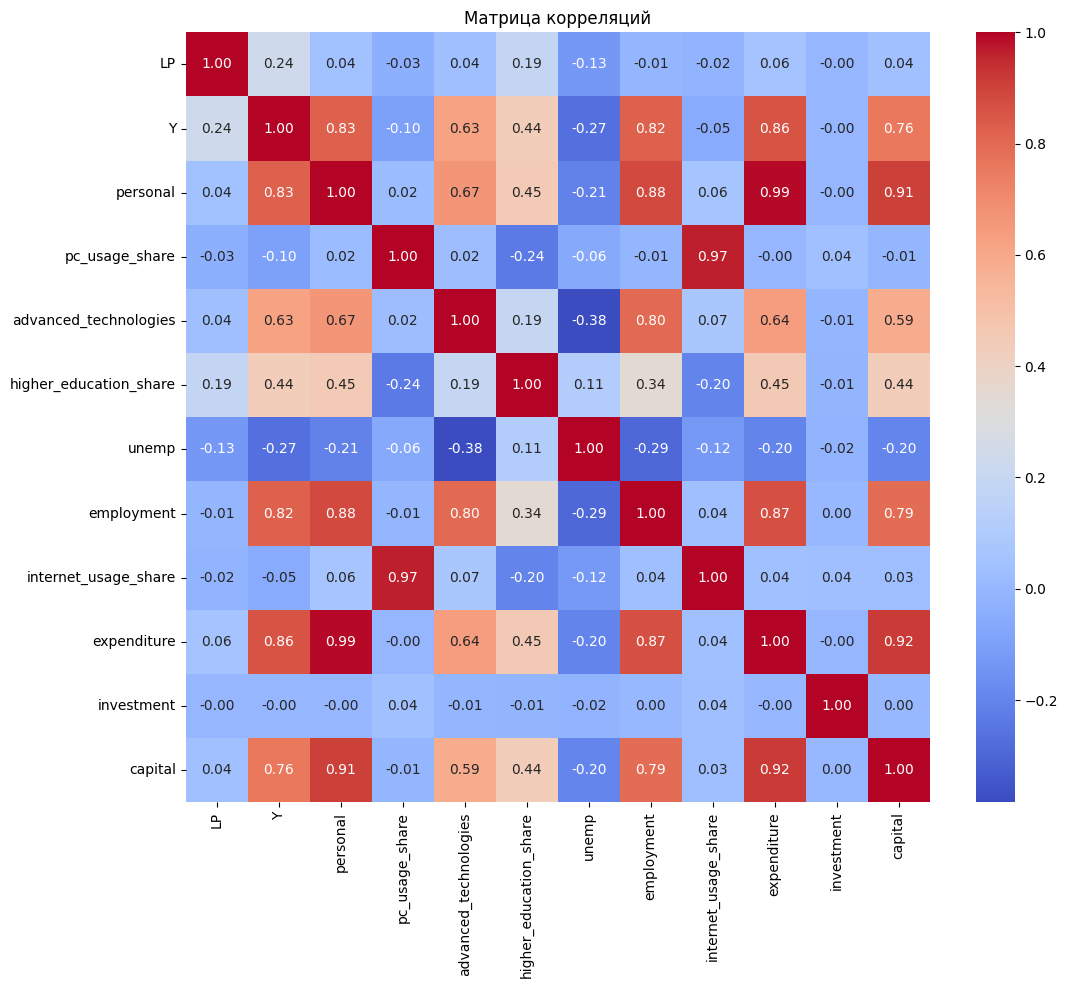

,LP,Y,personal,pc_usage_share,advanced_technologies,higher_education_share,unemp,employment,internet_usage_share,expenditure,investment,capital
LP,1.000000,0.236774,0.043408,-0.033295,0.035763,0.189177,-0.131410,-0.010393,-0.020893,0.057483,-0.004946,0.040719
Y,0.236774,1.000000,0.825603,-0.100205,0.625846,0.435312,-0.269292,0.823227,-0.054587,0.857963,-0.000620,0.757863
personal,0.043408,0.825603,1.000000,0.019164,0.666160,0.450891,-0.207912,0.883504,0.059953,0.991071,-0.003291,0.905482
pc_usage_share,-0.033295,-0.100205,0.019164,1.000000,0.022099,-0.236622,-0.060236,-0.007915,0.965090,-0.002326,0.041855,-0.008205
advanced_technologies,0.035763,0.625846,0.666160,0.022099,1.000000,0.189890,-0.383763,0.801672,0.072006,0.641434,-0.006911,0.585181
higher_education_share,0.189177,0.435312,0.450891,-0.236622,0.189890,1.000000,0.113306,0.344847,-0.204921,0.454887,-0.012058,0.437661
unemp,-0.131410,-0.269292,-0.207912,-0.060236,-0.383763,0.113306,1.000000,-0.292765,-0.124527,-0.203470,-0.019886,-0.195111
employment,-0.010393,0.823227,0.883504,-0.007915,0.801672,0.344847,-0.292765,1.000000,0.036510,0.867422,0.001964,0.792586
internet_usage_share,-0.020893,-0.054587,0.059953,0.965090,0.072006,-0.204921,-0.124527,0.036510,1.000000,0.038976,0.037206,0.031793
expenditure,0.057483,0.857963,0.991071,-0.002326,0.641434,0.454887,-0.203470,0.867422,0.038976,1.000000,-0.002608,0.916886


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "NIRR.xlsx"
df = pd.read_excel(path)

vars_corr = [
    "LP", "Y",
    "personal",
    "pc_usage_share",
    "advanced_technologies",
    "higher_education_share",
    "unemp",
    "employment",
    "internet_usage_share",
    "expenditure",
    "investment",
    "capital"
]

# Преобразуем всё в числа
for col in vars_corr:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(" ", "", regex=False)
        .str.replace(",", ".", regex=False)
        .replace("-", np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Корреляция
corr = df[vars_corr].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корреляций")
plt.show()

corr

In [20]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vars_vif = [
    "personal",
    "pc_usage_share",
    "advanced_technologies",
    "higher_education_share",
    "internet_usage_share",
    "expenditure"
]

# Чистка и приведение к числам
for col in vars_vif:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(" ", "", regex=False)
        .str.replace(",", ".", regex=False)
        .replace("-", np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Убираем пропуски
df_vif = df[vars_vif].dropna().copy()

# Добавляем константу
X = sm.add_constant(df_vif)

# Считаем VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,213.664656
1,personal,63.927295
2,pc_usage_share,15.351848
3,advanced_technologies,1.949992
4,higher_education_share,1.399362
5,internet_usage_share,15.196056
6,expenditure,59.921755


In [21]:
# 1) гетероскедастичность (Breusch–Pagan + White на pooled OLS)
# 2) автокорреляция в панели (Wooldridge test)

import numpy as np
import pandas as pd

path = "NIRR.xlsx"
df = pd.read_excel(path)

df["region"] = df["region"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 1) Чистка чисел
def to_numeric_clean(s: pd.Series) -> pd.Series:
    # '1 234,5' -> 1234.5 ; '-' -> NaN
    return pd.to_numeric(
        s.astype(str)
         .str.replace(" ", "", regex=False)
         .str.replace(",", ".", regex=False)
         .replace("-", np.nan),
        errors="coerce"
    )

# колонки которые точно нужны под пример
need_cols = ["LP","personal","expenditure","advanced_technologies","employment",
             "pc_usage_share","internet_usage_share","higher_education_share",
             "investment","capital","unemp"]

for c in need_cols:
    if c in df.columns:
        df[c] = to_numeric_clean(df[c])

# 2) Зависимая переменная
df["Y"] = np.log1p(df["LP"])

for c in ["investment", "capital", "personal", "expenditure"]:
    if c in df.columns:
        df[c] = np.log1p(df[c])

# 3) AI_index_eqw
from sklearn.preprocessing import StandardScaler

def add_ai_index_eqw(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "AI_index_eqw" in df.columns and df["AI_index_eqw"].notna().any():
        return df

    df_idx = df.copy()
    df_idx.loc[df_idx["employment"] == 0, "employment"] = np.nan

    df_idx["personal_per_emp"] = df_idx["personal"] / df_idx["employment"]
    df_idx["expend_per_emp"]   = df_idx["expenditure"] / df_idx["employment"]
    df_idx["advtech_per_emp"]  = df_idx["advanced_technologies"] / df_idx["employment"]

    ai_vars = [
        "personal_per_emp",
        "expend_per_emp",
        "advtech_per_emp",
        "pc_usage_share",
        "internet_usage_share",
        "higher_education_share",
    ]

    for c in ["personal_per_emp", "expend_per_emp", "advtech_per_emp"]:
        df_idx[c] = np.log1p(df_idx[c])

    tmp = df_idx[["region","year"] + ai_vars].dropna().copy()
    Z = StandardScaler().fit_transform(tmp[ai_vars])
    tmp["AI_index_eqw"] = Z.mean(axis=1)

    return df.merge(tmp[["region","year","AI_index_eqw"]], on=["region","year"], how="left")

df = add_ai_index_eqw(df)

# 4) Данные под диагностику
vars_model = ["Y", "AI_index_eqw", "investment", "capital", "unemp"]
data = df[["region","year"] + vars_model].dropna().copy()

# A) ГЕТЕРОСКЕДАСТИЧНОСТЬ (на pooled OLS)
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

y_ols = data["Y"]
X_ols = sm.add_constant(data[["AI_index_eqw","investment","capital","unemp"]])

ols = sm.OLS(y_ols, X_ols).fit()  # обычные (не-robust) SE, чтобы тесты были корректны
resid = ols.resid

# Breusch–Pagan
bp_lm, bp_lmpval, bp_f, bp_fpval = het_breuschpagan(resid, X_ols)

# White
w_lm, w_lmpval, w_f, w_fpval = het_white(resid, X_ols)

print("\nТест на гетероскедастичность")
print("Breusch–Pagan:")
print(f"  LM stat = {bp_lm:.4f} | LM p-value = {bp_lmpval:.6g}")
print(f"  F  stat = {bp_f:.4f}  | F  p-value = {bp_fpval:.6g}")
print("White:")
print(f"  LM stat = {w_lm:.4f}  | LM p-value = {w_lmpval:.6g}")
print(f"  F  stat = {w_f:.4f}   | F  p-value = {w_fpval:.6g}")

print("\n(Если p-value < 0.05 => гетероскедастичность есть; тогда в моделях используй robust/clustered SE.)")

# B) АВТОКОРРЕЛЯЦИЯ В ПАНЕЛИ
from linearmodels.panel import PanelOLS

panel = data.set_index(["region","year"]).sort_index()

y_fe = panel["Y"]
X_fe = panel[["AI_index_eqw","investment","capital","unemp"]]

fe = PanelOLS(y_fe, X_fe, entity_effects=True, drop_absorbed=True).fit(cov_type="unadjusted")

e = fe.resids.copy()
e = e.to_frame("e")

e["e_lag1"] = e.groupby(level=0)["e"].shift(1)
e["de"] = e.groupby(level=0)["e"].diff(1)

wdf = e.dropna().copy()

Y_w = wdf["de"].values
X_w = wdf[["e_lag1"]].values

w_ols = sm.OLS(Y_w, X_w).fit()  # F-test/ t-test

print("\nАвтокорреляция в панели")
print(f"b = {float(w_ols.params[0]):.4f}")
print(f"t = {float(w_ols.tvalues[0]):.4f} | p-value = {float(w_ols.pvalues[0]):.6g}")


Тест на гетероскедастичность
Breusch–Pagan:
  LM stat = 171.0562 | LM p-value = 6.20547e-36
  F  stat = 55.1152  | F  p-value = 1.06107e-40
White:
  LM stat = 602.5536  | LM p-value = 1.52163e-119
  F  stat = 219.3287   | F  p-value = 1.87943e-250

(Если p-value < 0.05 => гетероскедастичность есть; тогда в моделях используй robust/clustered SE.)

Автокорреляция в панели
b = -0.6011
t = -20.9332 | p-value = 4.6465e-75


Проведённая диагностика показала наличие гетероскедастичности и автокорреляции в панельных данных. Согласно тестам Breusch–Pagan и White, нулевая гипотеза о гомоскедастичности отвергается (p < 0.001), что указывает на неоднородность дисперсии ошибок. Wooldridge-тест также выявил значимую автокорреляцию в остатках моделей (p < 0.001). В связи с этим во всех моделях используются робастные и кластеризованные стандартные ошибки, что обеспечивает корректность статистических выводов.

Получим AI_index из следующих переменных:

- advanced_technologies — прямой технологический прокси

- expenditure — R&D затраты (инновационная активность)

- personal — R&D персонал (научная база)

- pc_usage_share, internet_usage_share — цифровая инфраструктура/использование ИКТ

- higher_education_share — человеческий капитал

Таким образом, AI_index строится из:
personal, pc_usage_share, internet_usage_share, advanced_technologies, higher_education_share, expenditure
а investment, capital, unemp оставляем в модели как контроли.

ЗАВИСИМАЯ ПЕРЕМЕННАЯ - LP


POOLED OLS (HC3)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     94.08
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           1.04e-64
Time:                        17:11:38   Log-Likelihood:                -403.29
No. Observations:                 746   AIC:                             816.6
Df Residuals:                     741   BIC:                             839.7
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.1058      0

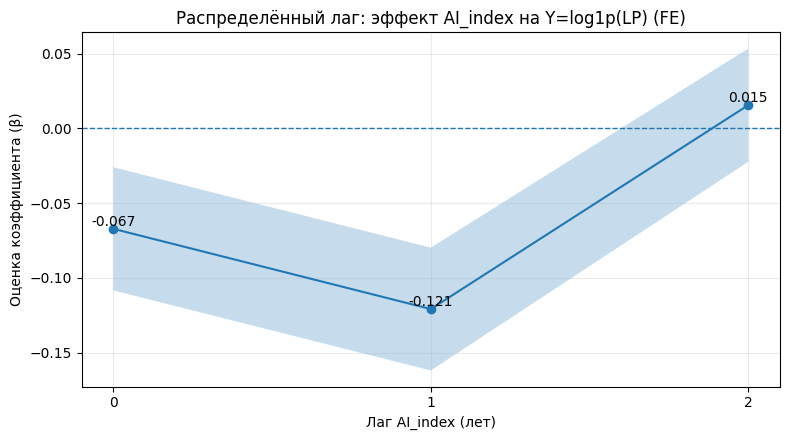


Распределенный лаг
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.0492
Estimator:                   PanelOLS   R-squared (Between):              0.0470
No. Observations:                 580   R-squared (Within):               0.0055
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0470
Time:                        17:11:40   Log-likelihood                    700.48
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.1832
Entities:                          83   P-value                           0.0004
Avg Obs:                       6.9880   Distribution:                   F(6,485)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             13.326
        

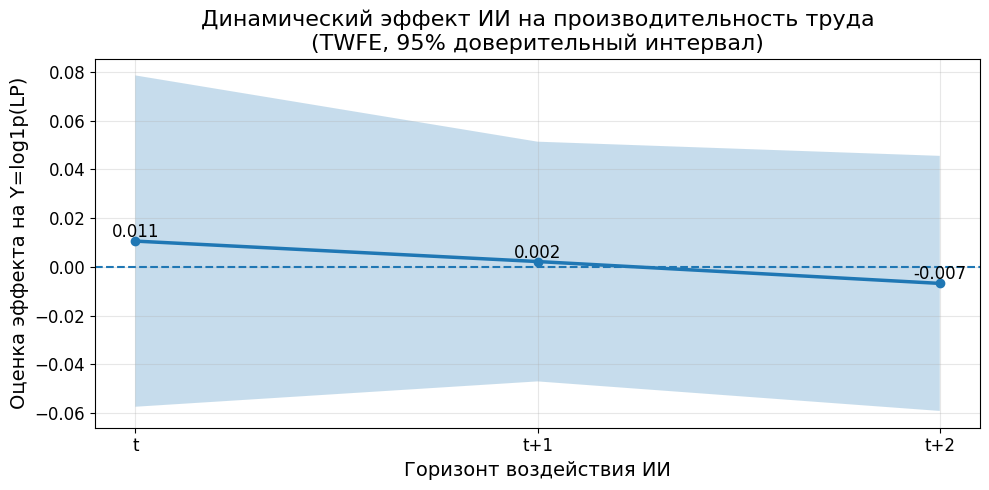


RE
                        RandomEffects Estimation Summary                        
Dep. Variable:                      Y   R-squared:                        0.1085
Estimator:              RandomEffects   R-squared (Between):              0.0074
No. Observations:                 746   R-squared (Within):               0.2904
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0076
Time:                        17:11:40   Log-likelihood                    8.7868
Cov. Estimator:                Robust                                           
                                        F-statistic:                      22.582
Entities:                          83   P-value                           0.0000
Avg Obs:                       8.9880   Distribution:                   F(4,742)
Min Obs:                       8.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             19.629
                        

In [22]:
# LP = AI_index + unemp + capital + investment

import numpy as np
import pandas as pd

path = "NIRR.xlsx"
df = pd.read_excel(path)

df["region"] = df["region"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 1) Y = log1p(LP)
df["LP"] = pd.to_numeric(df["LP"], errors="coerce")
df["Y"] = np.log1p(df["LP"])

for col in ["personal", "expenditure", "investment", "capital"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = np.log1p(df[col])

# 2) AI_index_eqw
from sklearn.preprocessing import StandardScaler

df_idx = df.copy()

num_cols = [
    "personal", "expenditure", "advanced_technologies", "employment",
    "pc_usage_share", "internet_usage_share", "higher_education_share"
]

for c in num_cols:
    if c in df_idx.columns:
        df_idx[c] = (df_idx[c].astype(str)
                     .str.replace(" ", "", regex=False)
                     .str.replace(",", ".", regex=False))
        df_idx[c] = pd.to_numeric(df_idx[c], errors="coerce")

df_idx.loc[df_idx["employment"] == 0, "employment"] = np.nan

df_idx["personal_per_emp"] = df_idx["personal"] / df_idx["employment"]
df_idx["expend_per_emp"]   = df_idx["expenditure"] / df_idx["employment"]
df_idx["advtech_per_emp"]  = df_idx["advanced_technologies"] / df_idx["employment"]

ai_vars = [
    "personal_per_emp",
    "expend_per_emp",
    "advtech_per_emp",
    "pc_usage_share",
    "internet_usage_share",
    "higher_education_share",
]

for c in ["personal_per_emp", "expend_per_emp", "advtech_per_emp"]:
    df_idx[c] = np.log1p(df_idx[c])

tmp = df_idx[["region", "year"] + ai_vars].dropna().copy()
Z = StandardScaler().fit_transform(tmp[ai_vars])
tmp["AI_index_eqw"] = Z.mean(axis=1)

df = df.merge(tmp[["region", "year", "AI_index_eqw"]], on=["region", "year"], how="left")

# 3) Pooled OLS (HC3)
import statsmodels.api as sm

vars_model = ["Y", "AI_index_eqw", "investment", "capital", "unemp"]
data_ols = df[vars_model].dropna().copy()

Y_ols = data_ols["Y"]
X_ols = data_ols[["AI_index_eqw", "unemp", "capital", "investment"]]
X_ols = sm.add_constant(X_ols)

results_pooled = sm.OLS(Y_ols, X_ols).fit(cov_type="HC3")
print("\nPOOLED OLS (HC3)")
print(results_pooled.summary())

# 4) FE
from linearmodels.panel import PanelOLS

df_panel = df.set_index(["region", "year"]).sort_index()
data_fe = df_panel[vars_model].dropna().copy()

y = data_fe["Y"]
X = data_fe[["AI_index_eqw", "unemp", "capital", "investment"]]

results_fe = PanelOLS(y, X, entity_effects=True).fit(cov_type="robust")
print("\nFE (Entity)")
print(results_fe.summary)

# 5) TWFE
results_twfe = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(
    cov_type="clustered", cluster_entity=True, cluster_time=True
)
print("\nTWFE (Entity + Time)")
print(results_twfe.summary)

# 6) TWFE vs FE
import scipy.stats as stats

SSR_fe = float(np.sum(np.asarray(results_fe.resids) ** 2))
SSR_twfe = float(np.sum(np.asarray(results_twfe.resids) ** 2))

n = int(results_fe.nobs)
k_fe = int(results_fe.df_model)
k_twfe = int(results_twfe.df_model)
q = k_twfe - k_fe

F_time = ((SSR_fe - SSR_twfe) / q) / (SSR_twfe / (n - k_twfe))
p_time = 1 - stats.f.cdf(F_time, q, n - k_twfe)

print("\n TWFE vs FE")
print("F-statistic:", F_time)
print("df1 (q):", q)
print("df2:", n - k_twfe)
print("p-value:", p_time)

# 7) FE lag (0,7)
data_base = df_panel[vars_model].dropna().copy()
results_lags = {}

print("\nFE lag")
for lag in range(0, 8):
    d = data_base.copy()
    d["AI_index_lag"] = d.groupby(level=0)["AI_index_eqw"].shift(lag) if lag > 0 else d["AI_index_eqw"]
    d = d.dropna(subset=["AI_index_lag"])

    y_l = d["Y"]
    X_l = d[["AI_index_lag", "unemp", "capital", "investment"]]

    res = PanelOLS(y_l, X_l, entity_effects=True).fit(cov_type="robust")
    results_lags[lag] = res
    print(f"\n--- lag={lag} ---")
    print(res.summary)

# 8) Распределенные лаги
from scipy import stats as st
import matplotlib.pyplot as plt

data_dl = df_panel[vars_model].dropna().copy()
data_dl["AI_lag0"] = data_dl["AI_index_eqw"]
data_dl["AI_lag1"] = data_dl.groupby(level=0)["AI_index_eqw"].shift(1)
data_dl["AI_lag2"] = data_dl.groupby(level=0)["AI_index_eqw"].shift(2)
data_dl = data_dl.dropna(subset=["AI_lag0", "AI_lag1", "AI_lag2"]).copy()

y_dl = data_dl["Y"]
X_dl = data_dl[["AI_lag0", "AI_lag1", "AI_lag2", "unemp", "capital", "investment"]]

res_fe_dl = PanelOLS(y_dl, X_dl, entity_effects=True).fit(cov_type="robust")
print("\nРаспределенные лаги")
print(res_fe_dl.summary)

beta_sum = float(res_fe_dl.params["AI_lag0"] + res_fe_dl.params["AI_lag1"] + res_fe_dl.params["AI_lag2"])

param_names = list(res_fe_dl.params.index)
a = np.zeros(len(param_names))
a[param_names.index("AI_lag0")] = 1.0
a[param_names.index("AI_lag1")] = 1.0
a[param_names.index("AI_lag2")] = 1.0

covm = res_fe_dl.cov.values
se_sum = float(np.sqrt(a @ covm @ a))
t_stat = beta_sum / se_sum
p_val = 2 * (1 - st.t.cdf(np.abs(t_stat), df=int(res_fe_dl.df_resid)))

print("\n Сумма эффектов (β0+β1+β2):", beta_sum)
print("SE:", se_sum)
print("t-stat:", float(t_stat))
print("p-value:", float(p_val))

# Plot FE DL
lags = [0, 1, 2]
names = [f"AI_lag{k}" for k in lags]
betas = np.array([res_fe_dl.params[n] for n in names], dtype=float)
ses = np.sqrt(np.array([res_fe_dl.cov.loc[n, n] for n in names], dtype=float))

z = 1.96
lower, upper = betas - z * ses, betas + z * ses

plt.figure(figsize=(8, 4.5))
plt.axhline(0, linestyle="--", linewidth=1)
plt.plot(lags, betas, marker="o")
plt.fill_between(lags, lower, upper, alpha=0.25)
for x_, yv in zip(lags, betas):
    plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom")
plt.title("Распределённый лаг: эффект AI_index на Y=log1p(LP) (FE)")
plt.xlabel("Лаг AI_index (лет)")
plt.ylabel("Оценка коэффициента (β)")
plt.xticks(lags)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# 9) Распределенный лаг TWFE (0..2)
results_twfe_dl = PanelOLS(y_dl, X_dl, entity_effects=True, time_effects=True).fit(
    cov_type="clustered", cluster_entity=True, cluster_time=True
)
print("\nРаспределенный лаг")
print(results_twfe_dl.summary)

betas_tw = np.array([results_twfe_dl.params[n] for n in names], dtype=float)
ses_tw = np.sqrt(np.array([results_twfe_dl.cov.loc[n, n] for n in names], dtype=float))

lower_tw, upper_tw = betas_tw - z * ses_tw, betas_tw + z * ses_tw

plt.figure(figsize=(10, 5))
plt.axhline(0, linestyle="--", linewidth=1.5)
plt.plot(lags, betas_tw, marker="o", linewidth=2.5)
plt.fill_between(lags, lower_tw, upper_tw, alpha=0.25)
for x_, yv in zip(lags, betas_tw):
    plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom", fontsize=12)
plt.xticks(lags, ["t", "t+1", "t+2"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Горизонт воздействия ИИ", fontsize=14)
plt.ylabel("Оценка эффекта на Y=log1p(LP)", fontsize=14)
plt.title("Динамический эффект ИИ на производительность труда\n(TWFE, 95% доверительный интервал)", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 10) Random Effects + Hausman
from linearmodels.panel import RandomEffects

results_re = RandomEffects(y, X).fit(cov_type="robust")
print("\nRE")
print(results_re.summary)

b_FE = results_fe.params
b_RE = results_re.params
V_FE = results_fe.cov
V_RE = results_re.cov

common = b_FE.index.intersection(b_RE.index)
b_diff = (b_FE[common] - b_RE[common]).values
V_diff = (V_FE.loc[common, common] - V_RE.loc[common, common]).values

print("\n Hausman FE vs RE")
try:
    stat_h = float(b_diff.T @ np.linalg.inv(V_diff) @ b_diff)
    df_h = len(common)
    p_h = 1 - stats.chi2.cdf(stat_h, df_h)
    print("Hausman statistic:", stat_h)
    print("df:", df_h)
    print("p-value:", p_h)
except np.linalg.LinAlgError:
    print("Hausman test failed")


RUN: CLUS_1 | file=clus_1.xlsx

[CLUS_1] POOLED OLS (HC3)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     112.1
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           9.28e-44
Time:                        17:11:41   Log-Likelihood:                 13.695
No. Observations:                 153   AIC:                            -17.39
Df Residuals:                     148   BIC:                            -2.238
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

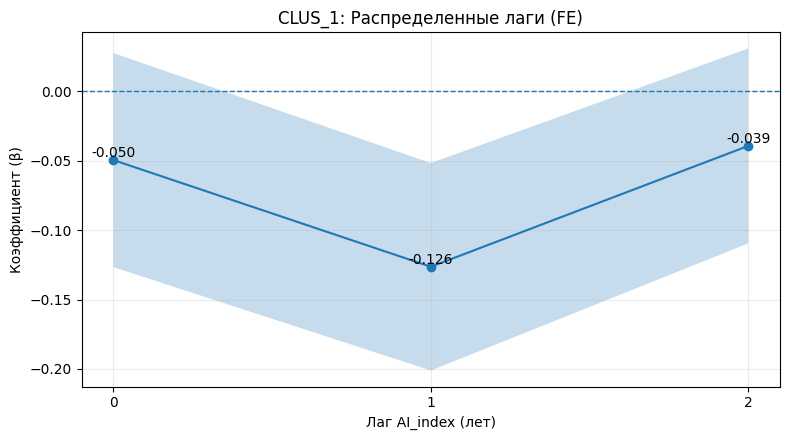


[CLUS_1] Распределенные лаги TWFE (0..2)
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.1854
Estimator:                   PanelOLS   R-squared (Between):             -0.0591
No. Observations:                 119   R-squared (Within):              -0.9168
Date:                Tue, Jan 20 2026   R-squared (Overall):             -0.0592
Time:                        17:11:43   Log-likelihood                    173.27
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.4143
Entities:                          17   P-value                           0.0044
Avg Obs:                       7.0000   Distribution:                    F(6,90)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):      

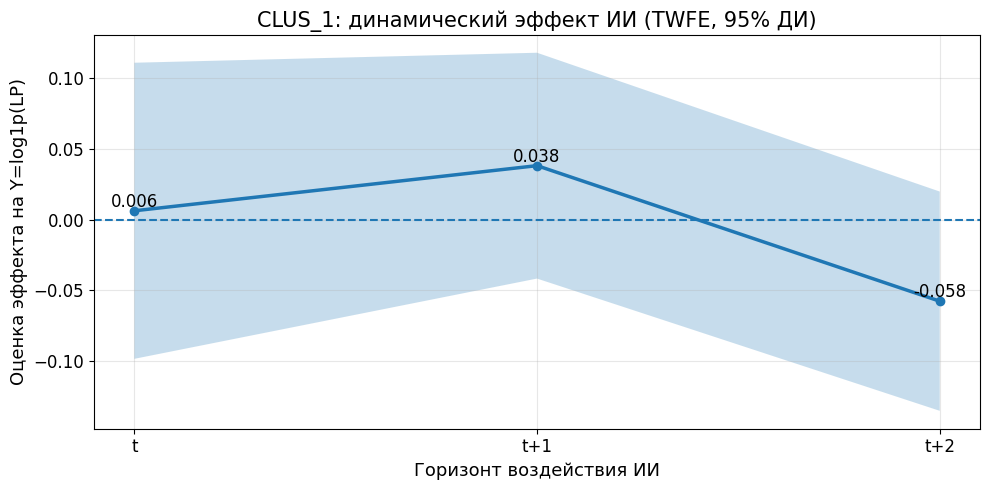


[CLUS_1] Random Effects (RE)
                        RandomEffects Estimation Summary                        
Dep. Variable:                      Y   R-squared:                        0.6755
Estimator:              RandomEffects   R-squared (Between):              0.8860
No. Observations:                 153   R-squared (Within):              -3.3154
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.8856
Time:                        17:11:44   Log-likelihood                   -61.520
Cov. Estimator:                Robust                                           
                                        F-statistic:                      77.529
Entities:                          17   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(4,149)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             91.06

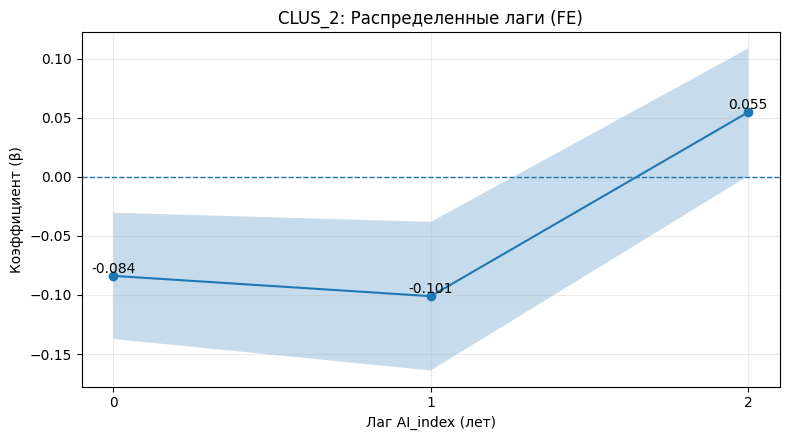


[CLUS_2] Распределенные лаги TWFE (0..2)
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.1251
Estimator:                   PanelOLS   R-squared (Between):              0.0471
No. Observations:                 294   R-squared (Within):               0.2091
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0471
Time:                        17:11:45   Log-likelihood                    373.28
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.7204
Entities:                          42   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(6,240)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):      

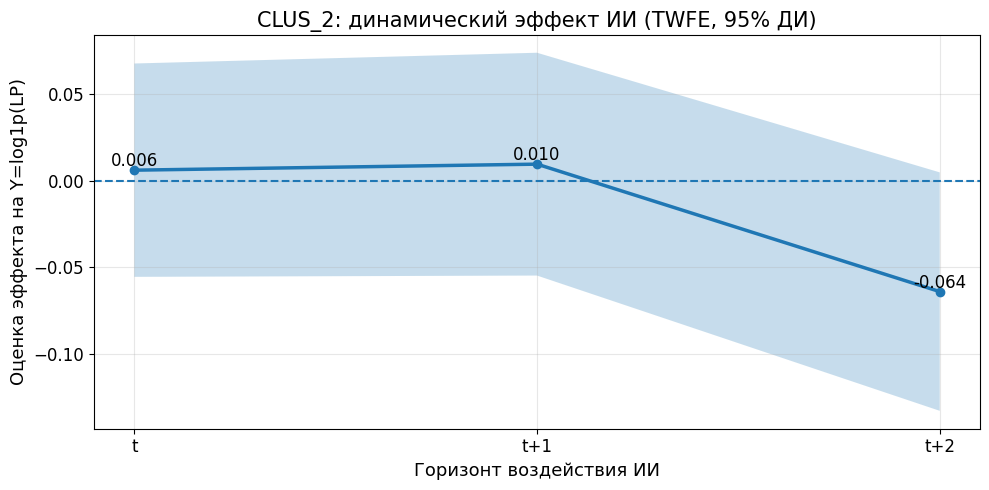


[CLUS_2] Random Effects (RE)
                        RandomEffects Estimation Summary                        
Dep. Variable:                      Y   R-squared:                        0.0778
Estimator:              RandomEffects   R-squared (Between):              0.0023
No. Observations:                 378   R-squared (Within):               0.3360
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0023
Time:                        17:11:46   Log-likelihood                   -81.209
Cov. Estimator:                Robust                                           
                                        F-statistic:                      7.8842
Entities:                          42   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(4,374)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             7.007

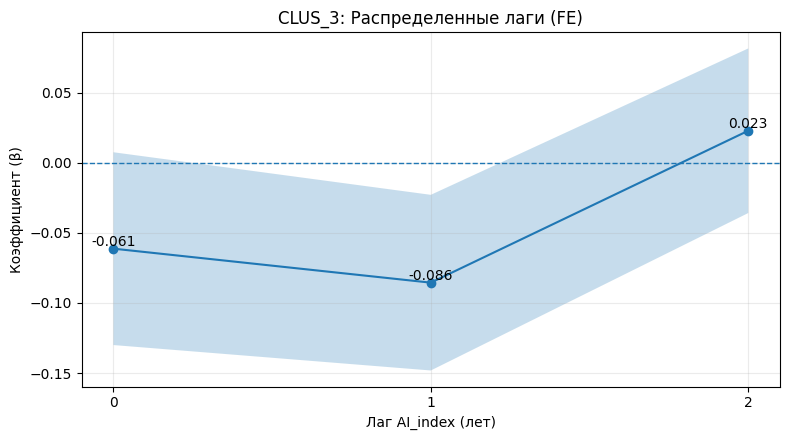


[CLUS_3] Распределенные лаги TWFE (0..2)
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.0602
Estimator:                   PanelOLS   R-squared (Between):              0.0291
No. Observations:                 167   R-squared (Within):              -0.2539
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0290
Time:                        17:11:49   Log-likelihood                    190.48
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.3994
Entities:                          24   P-value                           0.2196
Avg Obs:                       6.9583   Distribution:                   F(6,131)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):      

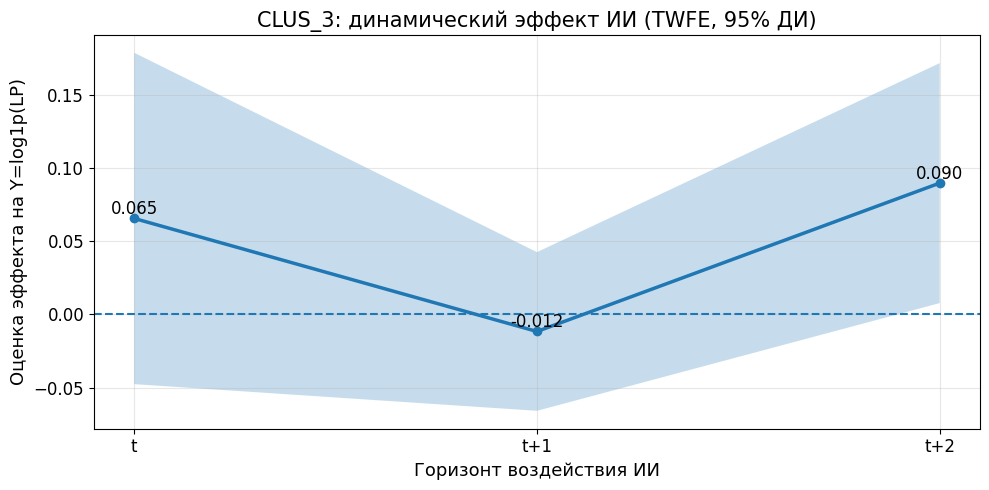


[CLUS_3] Random Effects (RE)
                        RandomEffects Estimation Summary                        
Dep. Variable:                      Y   R-squared:                        0.1029
Estimator:              RandomEffects   R-squared (Between):              0.0969
No. Observations:                 215   R-squared (Within):               0.1166
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0971
Time:                        17:11:50   Log-likelihood                   -29.839
Cov. Estimator:                Robust                                           
                                        F-statistic:                      6.0501
Entities:                          24   P-value                           0.0001
Avg Obs:                       8.9583   Distribution:                   F(4,211)
Min Obs:                       8.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             8.180

In [23]:
# CLUS_1 / CLUS_2 / CLUS_3
# Модель: Y = log1p(LP) = f(AI_index_eqw, investment, capital, unemp)
#
# Для каждого кластера код делает:
# 1) готовит данные + log1p для LP и части контролей
# 2) строит индекс AI_index_eqw (equal-weight по z-score компонент)
# 3) Pooled OLS (statsmodels) с робастными SE (HC3)
# 4) Pooled PanelOLS (linearmodels) с robust SE
# 5) FE (Entity fixed effects) + сравнение Pooled vs FE (F-test по SSR)
# 6) TWFE (Entity + Time fixed effects) + сравнение FE vs TWFE (F-test по SSR)
# 7) FE с одиночными лагами AI (0..7)
# 8) Distributed lags FE (0..2) + сумма эффектов + график
# 9) Distributed lags TWFE (0..2) + график (ВОЗВРАЩЕНО!)
# 10) RE (Random Effects) + Hausman FE vs RE
# 11) RE + time dummies (RE_time) + Hausman TWFE vs RE_time (по базовым регрессорам)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sps

from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects


# -----------------------
# ФАЙЛЫ КЛАСТЕРОВ
# -----------------------
cluster_files = {
    "CLUS_1": "clus_1.xlsx",
    "CLUS_2": "clus_2.xlsx",
    "CLUS_3": "clus_3.xlsx",
}

# Эти переменные (если есть в файлах) логарифмируем через log1p
LOG1P_CONTROLS = ["personal", "expenditure", "investment", "capital"]


# -----------------------
# ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
# -----------------------
def to_numeric_clean(s: pd.Series) -> pd.Series:
    """Преобразование вида '1 234,5' -> 1234.5"""
    return pd.to_numeric(
        s.astype(str)
         .str.replace(" ", "", regex=False)
         .str.replace(",", ".", regex=False),
        errors="coerce"
    )


def add_ai_index_eqw(df: pd.DataFrame) -> pd.DataFrame:
    """
    Строит AI_index_eqw (equal-weight по z-score):
    компоненты:
      - personal_per_emp = personal / employment
      - expend_per_emp   = expenditure / employment
      - advtech_per_emp  = advanced_technologies / employment
      - pc_usage_share
      - internet_usage_share
      - higher_education_share
    Далее:
      1) для per_emp компонент: log1p
      2) стандартизация (z-score) всех компонент
      3) AI_index_eqw = среднее z-score по компонентам
    """
    df = df.copy()

    # Если индекс уже есть и не пустой — не пересчитываем
    if "AI_index_eqw" in df.columns and df["AI_index_eqw"].notna().any():
        return df

    need = [
        "personal", "expenditure", "advanced_technologies", "employment",
        "pc_usage_share", "internet_usage_share", "higher_education_share"
    ]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise ValueError(f"Нет колонок для расчёта AI_index_eqw: {missing}")

    df_idx = df.copy()

    # чистим и приводим к числам
    for c in need:
        df_idx[c] = to_numeric_clean(df_idx[c])

    # деление на 0 недопустимо
    df_idx.loc[df_idx["employment"] == 0, "employment"] = np.nan

    df_idx["personal_per_emp"] = df_idx["personal"] / df_idx["employment"]
    df_idx["expend_per_emp"]   = df_idx["expenditure"] / df_idx["employment"]
    df_idx["advtech_per_emp"]  = df_idx["advanced_technologies"] / df_idx["employment"]

    ai_vars = [
        "personal_per_emp",
        "expend_per_emp",
        "advtech_per_emp",
        "pc_usage_share",
        "internet_usage_share",
        "higher_education_share",
    ]

    # log1p на интенсивности
    for c in ["personal_per_emp", "expend_per_emp", "advtech_per_emp"]:
        df_idx[c] = np.log1p(df_idx[c])

    tmp = df_idx[["region", "year"] + ai_vars].dropna().copy()
    Z = StandardScaler().fit_transform(tmp[ai_vars])
    tmp["AI_index_eqw"] = Z.mean(axis=1)

    df = df.merge(tmp[["region", "year", "AI_index_eqw"]],
                  on=["region", "year"], how="left")
    return df


def f_test_nested_by_ssr(ssr_restricted, ssr_unrestricted, n, k_unrestricted, q):
    """
    F = ((SSR_r - SSR_ur)/q) / (SSR_ur/(n - k_ur))
    q = число ограничений (разница в числе параметров)
    """
    F = ((ssr_restricted - ssr_unrestricted) / q) / (ssr_unrestricted / (n - k_unrestricted))
    p = 1 - sps.f.cdf(F, q, n - k_unrestricted)
    return float(F), float(p)


def hausman_test(params_A, cov_A, params_B, cov_B, common_names):
    """
    Hausman: (bA-bB)' [Var(bA)-Var(bB)]^{-1} (bA-bB)
    Важно: при robust/clustered ковариациях матрица может быть вырожденной.
    """
    bA = params_A[common_names].values
    bB = params_B[common_names].values
    V  = (cov_A.loc[common_names, common_names] - cov_B.loc[common_names, common_names]).values

    diff = bA - bB
    stat = float(diff.T @ np.linalg.inv(V) @ diff)
    df   = int(len(common_names))
    p    = float(1 - sps.chi2.cdf(stat, df))
    return stat, df, p


def run_cluster(path_xlsx: str, cluster_name: str):
    print("\n" + "=" * 110)
    print(f"RUN: {cluster_name} | file={path_xlsx}")
    print("=" * 110)

    # -----------------------
    # 0) Загрузка
    # -----------------------
    df = pd.read_excel(path_xlsx)

    df["region"] = df["region"].astype(str).str.strip()
    df["year"] = pd.to_numeric(df["year"], errors="coerce")

    # -----------------------
    # 1) Зависимая: Y = log1p(LP)
    # -----------------------
    df["LP"] = pd.to_numeric(df["LP"], errors="coerce")
    df["Y"] = np.log1p(df["LP"])

    # log1p для части контролей (если есть в файле)
    for col in LOG1P_CONTROLS:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
            df[col] = np.log1p(df[col])

    # -----------------------
    # 2) Индекс AI
    # -----------------------
    df = add_ai_index_eqw(df)

    # -----------------------
    # 3) Выбор переменных модели
    # -----------------------
    vars_model = ["Y", "AI_index_eqw", "investment", "capital", "unemp"]
    df_use = df[["region", "year"] + vars_model].dropna().copy()

    # -----------------------
    # (A) Pooled OLS (statsmodels) HC3
    # -----------------------
    Y_ols = df_use["Y"]
    X_ols = sm.add_constant(df_use[["AI_index_eqw", "investment", "capital", "unemp"]])
    res_ols = sm.OLS(Y_ols, X_ols).fit(cov_type="HC3")
    print(f"\n[{cluster_name}] POOLED OLS (HC3)")
    print(res_ols.summary())

    # -----------------------
    # Panel-индекс
    # -----------------------
    df_panel = df_use.set_index(["region", "year"]).sort_index()
    y = df_panel["Y"]
    X = df_panel[["AI_index_eqw", "investment", "capital", "unemp"]]

    # Кол-во регионов и периодов — БЕЗ .nentity (исправление твоей ошибки)
    n_entities = df_panel.index.get_level_values(0).nunique()
    n_periods  = df_panel.index.get_level_values(1).nunique()

    # -----------------------
    # (B) Pooled PanelOLS (robust)
    # -----------------------
    res_pooled = PanelOLS(y, X, entity_effects=False, time_effects=False).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Pooled (PanelOLS robust)")
    print(res_pooled.summary)

    # -----------------------
    # (C) FE (Entity)
    # -----------------------
    res_fe = PanelOLS(y, X, entity_effects=True, time_effects=False).fit(cov_type="robust")
    print(f"\n[{cluster_name}] FE (Entity)")
    print(res_fe.summary)

    # -----------------------
    # (D) Pooled vs FE (нужны ли FE регионов?) — F-test по SSR
    #     pooled ⊂ FE, ограничения = (N-1)
    # -----------------------
    ssr_pooled = float(np.sum(np.asarray(res_pooled.resids) ** 2))
    ssr_fe     = float(np.sum(np.asarray(res_fe.resids) ** 2))

    n = int(res_fe.nobs)

    # число "обычных" регрессоров в X (без константы/дамми)
    k_reg = X.shape[1]

    # в FE добавляются (N_entities - 1) параметров
    k_unrestricted = k_reg + (n_entities - 1)
    q = (n_entities - 1)

    F_pool, p_pool = f_test_nested_by_ssr(
        ssr_restricted=ssr_pooled,
        ssr_unrestricted=ssr_fe,
        n=n,
        k_unrestricted=k_unrestricted,
        q=q
    )

    print(f"\n[{cluster_name}] Pooled vs FE: F-test (нужны ли фикс. эффекты регионов?)")
    print("F-statistic:", F_pool)
    print("df1:", q, "df2:", n - k_unrestricted)
    print("p-value:", p_pool)

    # -----------------------
    # (E) TWFE (Entity + Time)
    # -----------------------
    res_twfe = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(
        cov_type="clustered", cluster_entity=True, cluster_time=True
    )
    print(f"\n[{cluster_name}] TWFE (Entity+Time)")
    print(res_twfe.summary)

    # -----------------------
    # (F) FE vs TWFE (нужны ли time FE?) — F-test по SSR
    #     FE ⊂ TWFE, ограничения = (T-1)
    # -----------------------
    ssr_twfe = float(np.sum(np.asarray(res_twfe.resids) ** 2))

    # в TWFE добавляются (N-1) + (T-1) параметров
    k_unrestricted_twfe = k_reg + (n_entities - 1) + (n_periods - 1)
    q_time = (n_periods - 1)

    F_time, p_time = f_test_nested_by_ssr(
        ssr_restricted=ssr_fe,
        ssr_unrestricted=ssr_twfe,
        n=n,
        k_unrestricted=k_unrestricted_twfe,
        q=q_time
    )

    print(f"\n[{cluster_name}] FE vs TWFE: F-test (нужны ли year FE?)")
    print("F-statistic:", F_time)
    print("df1:", q_time, "df2:", n - k_unrestricted_twfe)
    print("p-value:", p_time)

    # -----------------------
    # (G) FE с одиночными лагами AI (0..7)
    # -----------------------
    base = df_panel.copy()
    print(f"\n[{cluster_name}] FE with single AI lag (0..7)")
    fe_lags = {}

    for lag in range(0, 8):
        d = base.copy()
        d["AI_index_lag"] = d.groupby(level=0)["AI_index_eqw"].shift(lag) if lag > 0 else d["AI_index_eqw"]
        d = d.dropna(subset=["AI_index_lag"]).copy()

        y_l = d["Y"]
        X_l = d[["AI_index_lag", "investment", "capital", "unemp"]]

        try:
            res = PanelOLS(y_l, X_l, entity_effects=True).fit(cov_type="robust")
            fe_lags[lag] = res
            print(f"  lag={lag}: beta={float(res.params['AI_index_lag']):.4f}, "
                  f"p={float(res.pvalues['AI_index_lag']):.4g}, n={int(res.nobs)}")
        except Exception as e:
            print(f"  lag={lag}: не оценилось ({type(e).__name__})")

    # -----------------------
    # (H) Distributed lags FE (0..2) + сумма эффектов + график
    # -----------------------
    dld = base.copy()
    dld["AI_lag0"] = dld["AI_index_eqw"]
    dld["AI_lag1"] = dld.groupby(level=0)["AI_index_eqw"].shift(1)
    dld["AI_lag2"] = dld.groupby(level=0)["AI_index_eqw"].shift(2)
    dld = dld.dropna(subset=["AI_lag0", "AI_lag1", "AI_lag2"]).copy()

    y_dl = dld["Y"]
    X_dl = dld[["AI_lag0", "AI_lag1", "AI_lag2", "investment", "capital", "unemp"]]

    res_fe_dl = PanelOLS(y_dl, X_dl, entity_effects=True).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Distributed lags FE (0..2)")
    print(res_fe_dl.summary)

    beta_sum = float(res_fe_dl.params["AI_lag0"] + res_fe_dl.params["AI_lag1"] + res_fe_dl.params["AI_lag2"])

    pn = list(res_fe_dl.params.index)
    a = np.zeros(len(pn))
    for nm in ["AI_lag0", "AI_lag1", "AI_lag2"]:
        a[pn.index(nm)] = 1.0

    se_sum = float(np.sqrt(a @ res_fe_dl.cov.values @ a))
    t_sum = beta_sum / se_sum
    p_sum = 2 * (1 - sps.t.cdf(abs(t_sum), df=int(res_fe_dl.df_resid)))

    print(f"\n[{cluster_name}] Суммарный эффект AI (β0+β1+β2): {beta_sum:.6f}")
    print(f"SE: {se_sum:.6f} | t: {float(t_sum):.3f} | p: {float(p_sum):.6g}")

    # график FE DL
    lags = [0, 1, 2]
    names = ["AI_lag0", "AI_lag1", "AI_lag2"]
    betas = np.array([float(res_fe_dl.params[n]) for n in names], dtype=float)
    ses = np.sqrt(np.array([float(res_fe_dl.cov.loc[n, n]) for n in names], dtype=float))

    z = 1.96
    lower, upper = betas - z * ses, betas + z * ses

    plt.figure(figsize=(8, 4.5))
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.plot(lags, betas, marker="o")
    plt.fill_between(lags, lower, upper, alpha=0.25)
    for x_, yv in zip(lags, betas):
        plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom")
    plt.title(f"{cluster_name}: Распределенные лаги (FE)")
    plt.xlabel("Лаг AI_index (лет)")
    plt.ylabel("Коэффициент (β)")
    plt.xticks(lags)
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    # -----------------------
    # (I) Distributed lags TWFE (0..2) + ГРАФИК (вернули!)
    # -----------------------
    res_twfe_dl = PanelOLS(y_dl, X_dl, entity_effects=True, time_effects=True).fit(
        cov_type="clustered", cluster_entity=True, cluster_time=True
    )
    print(f"\n[{cluster_name}] Распределенные лаги TWFE (0..2)")
    print(res_twfe_dl.summary)

    betas_tw = np.array([float(res_twfe_dl.params[n]) for n in names], dtype=float)
    ses_tw = np.sqrt(np.array([float(res_twfe_dl.cov.loc[n, n]) for n in names], dtype=float))
    lower_tw, upper_tw = betas_tw - z * ses_tw, betas_tw + z * ses_tw

    plt.figure(figsize=(10, 5))
    plt.axhline(0, linestyle="--", linewidth=1.5)
    plt.plot(lags, betas_tw, marker="o", linewidth=2.5)
    plt.fill_between(lags, lower_tw, upper_tw, alpha=0.25)
    for x_, yv in zip(lags, betas_tw):
        plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom", fontsize=12)

    plt.xticks(lags, ["t", "t+1", "t+2"], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Горизонт воздействия ИИ", fontsize=13)
    plt.ylabel("Оценка эффекта на Y=log1p(LP)", fontsize=13)
    plt.title(f"{cluster_name}: динамический эффект ИИ (TWFE, 95% ДИ)", fontsize=15)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # -----------------------
    # (J) RE + Hausman (FE vs RE)
    # -----------------------
    res_re = RandomEffects(y, X).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Random Effects (RE)")
    print(res_re.summary)

    common = list(res_fe.params.index.intersection(res_re.params.index))
    print(f"\n[{cluster_name}] Hausman: FE vs RE (по общим регрессорам)")
    try:
        stat_h, df_h, p_h = hausman_test(res_fe.params, res_fe.cov, res_re.params, res_re.cov, common)
        print("Hausman statistic:", stat_h)
        print("df:", df_h)
        print("p-value:", p_h)
    except Exception as e:
        print("Hausman не посчитался (часто при robust/вырожденной матрице):", type(e).__name__)

    # -----------------------
    # (K) RE + time dummies (RE_time) + Hausman TWFE vs RE_time
    # -----------------------
    # Добавляем дамми-переменные по годам в X для RE
    years = df_use["year"].dropna().astype(int)
    year_dum = pd.get_dummies(years, prefix="year", drop_first=True)
    year_dum.index = df_use.index

    df_re_time = df_use.join(year_dum)
    df_re_time = df_re_time.set_index(["region", "year"]).sort_index()

    y_rt = df_re_time["Y"]
    X_rt = df_re_time[["AI_index_eqw", "investment", "capital", "unemp"] + list(year_dum.columns)]

    res_re_time = RandomEffects(y_rt, X_rt).fit(cov_type="robust")
    print(f"\n[{cluster_name}] RE + Time dummies (RE_time)")
    print(res_re_time.summary)

    # Hausman: TWFE vs RE_time (только по базовым регрессорам)
    base_regs = ["AI_index_eqw", "investment", "capital", "unemp"]
    common2 = [v for v in base_regs if v in res_twfe.params.index and v in res_re_time.params.index]

    print(f"\n[{cluster_name}] Hausman: TWFE vs RE_time (по основным регрессорам)")
    try:
        stat2, df2, p2 = hausman_test(res_twfe.params, res_twfe.cov, res_re_time.params, res_re_time.cov, common2)
        print("Hausman statistic:", stat2)
        print("df:", df2)
        print("p-value:", p2)
    except Exception as e:
        print("Hausman не посчитался (часто при clustered/robust):", type(e).__name__)

    # Возвращаем результаты (если захочешь дальше аккумулировать в словарь)
    return {
        "ols": res_ols,
        "pooled_panel": res_pooled,
        "fe": res_fe,
        "twfe": res_twfe,
        "pooled_vs_fe": {"F": F_pool, "p": p_pool, "df1": q, "df2": n - k_unrestricted},
        "fe_vs_twfe": {"F": F_time, "p": p_time, "df1": q_time, "df2": n - k_unrestricted_twfe},
        "fe_lags": fe_lags,
        "fe_dl": res_fe_dl,
        "twfe_dl": res_twfe_dl,
        "re": res_re,
        "re_time": res_re_time,
    }


# -----------------------
# ЗАПУСК ДЛЯ ВСЕХ КЛАСТЕРОВ
# -----------------------
all_results = {}
for cname, fpath in cluster_files.items():
    all_results[cname] = run_cluster(fpath, cname)

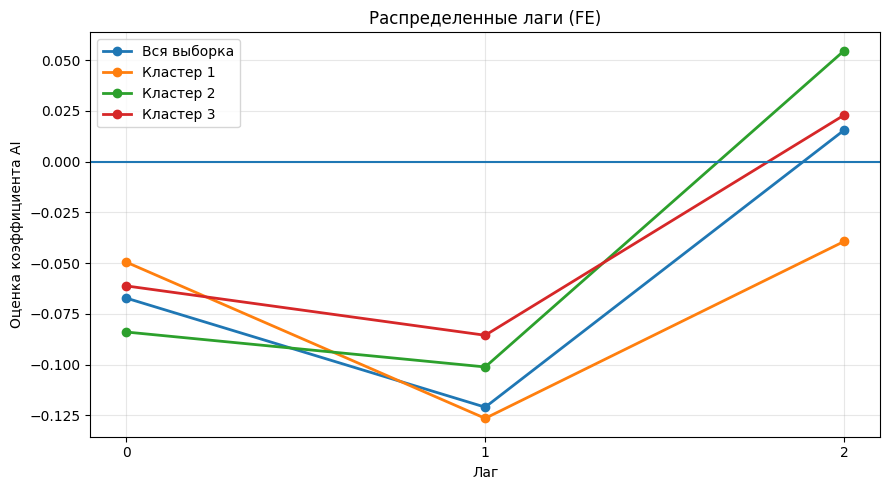

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Оценки коэффициентов AI из твоих таблиц (FE distributed lags 0..2)
lags = [0, 1, 2]

data = {
    "Вся выборка": [-0.0672, -0.1209, 0.0155],
    "Кластер 1":   [-0.0495, -0.1264, -0.0393],
    "Кластер 2":   [-0.0839, -0.1011, 0.0546],
    "Кластер 3":   [-0.0612, -0.0855, 0.0229],
}

df = pd.DataFrame(data, index=lags)

plt.figure(figsize=(9, 5))

for label in df.columns:
    plt.plot(df.index, df[label], marker="o", linewidth=2, label=label)

plt.axhline(0)  # линия нуля
plt.xticks(lags)
plt.xlabel("Лаг")
plt.ylabel("Оценка коэффициента AI")
plt.title("Распределенные лаги (FE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

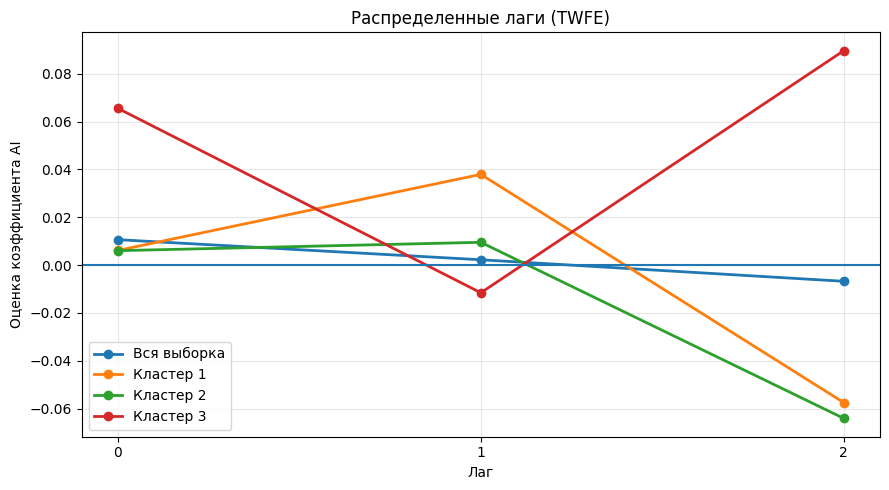

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Лаги
lags = [0, 1, 2]

# Коэффициенты AI из TWFE-моделей
data = {
    "Вся выборка": [0.0106, 0.0022, -0.0068],
    "Кластер 1":   [0.0061, 0.0379, -0.0575],
    "Кластер 2":   [0.0060, 0.0095, -0.0641],
    "Кластер 3":   [0.0655, -0.0116, 0.0896],
}

df = pd.DataFrame(data, index=lags)

# Построение графика
plt.figure(figsize=(9, 5))

for col in df.columns:
    plt.plot(df.index, df[col], marker="o", linewidth=2, label=col)

plt.axhline(0)  # линия нуля
plt.xticks(lags)
plt.xlabel("Лаг")
plt.ylabel("Оценка коэффициента AI")
plt.title("Распределенные лаги (TWFE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ЗАВИСИМАЯ ПЕРЕМЕННАЯ - Y


POOLED OLS (HC3) | depvar = Y_log
                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     685.6
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          2.63e-247
Time:                        17:11:51   Log-Likelihood:                -394.05
No. Observations:                 746   AIC:                             798.1
Df Residuals:                     741   BIC:                             821.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        

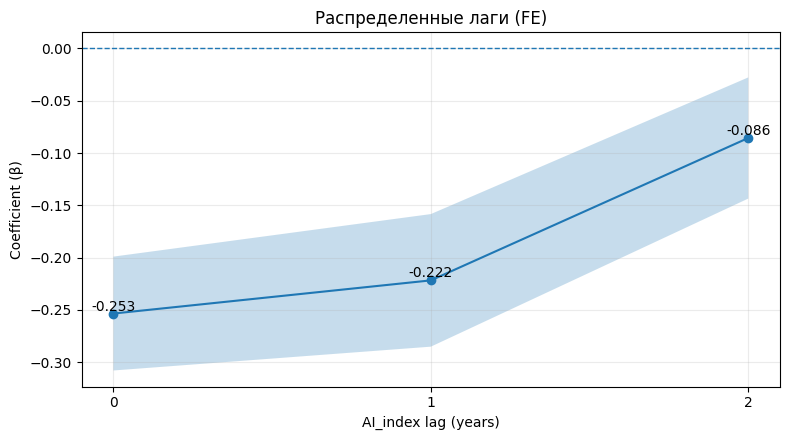


Распределенные лаги TWFE
                          PanelOLS Estimation Summary                           
Dep. Variable:                  Y_log   R-squared:                        0.0623
Estimator:                   PanelOLS   R-squared (Between):              0.1697
No. Observations:                 580   R-squared (Within):               0.0605
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.1657
Time:                        17:11:53   Log-likelihood                    757.28
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.3747
Entities:                          83   P-value                           0.0000
Avg Obs:                       6.9880   Distribution:                   F(6,485)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             3.7478
  

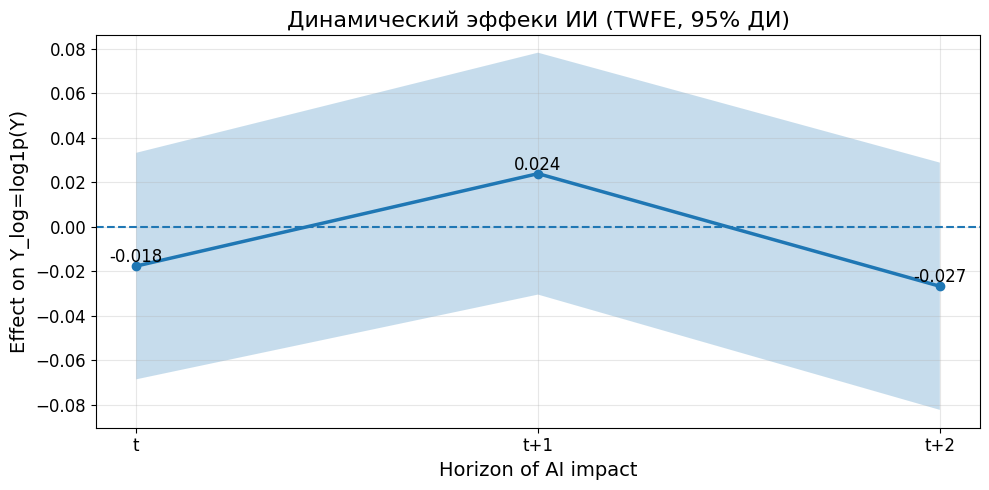


RE (Random effects) | depvar = Y_log
                        RandomEffects Estimation Summary                        
Dep. Variable:                  Y_log   R-squared:                        0.5731
Estimator:              RandomEffects   R-squared (Between):              0.7100
No. Observations:                 746   R-squared (Within):               0.4183
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.6931
Time:                        17:11:54   Log-likelihood                   -51.913
Cov. Estimator:                Robust                                           
                                        F-statistic:                      248.72
Entities:                          83   P-value                           0.0000
Avg Obs:                       8.9880   Distribution:                   F(4,741)
Min Obs:                       8.0000                                           
Max Obs:                       9.0000   F-statistic (robust):          

In [24]:
# Модель: Y_log = f(AI_index_eqw, unemp, capital, investment)
# ВАЖНО: зависимая переменная теперь берётся из колонки df["Y"],
# и затем строится логарифм: Y_log = log1p(Y).
# LP больше НЕ используется как зависимая переменная.

import numpy as np
import pandas as pd

# -----------------------
# 0) Загрузка данных
# -----------------------
path = "NIRR.xlsx"
df = pd.read_excel(path)

df["region"] = df["region"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# -----------------------
# 1) Зависимая переменная: Y_log = log1p(Y)
# -----------------------
LOG1P_CONTROLS = ["personal", "expenditure", "investment", "capital"]

df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
df["Y_log"] = np.log1p(df["Y"])

for col in LOG1P_CONTROLS:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = np.log1p(df[col])

# -----------------------
# 2) Индекс AI_index_eqw
# -----------------------
from sklearn.preprocessing import StandardScaler

df_idx = df.copy()

num_cols = [
    "personal", "expenditure", "advanced_technologies", "employment",
    "pc_usage_share", "internet_usage_share", "higher_education_share"
]

for c in num_cols:
    if c in df_idx.columns:
        df_idx[c] = (df_idx[c].astype(str)
                     .str.replace(" ", "", regex=False)
                     .str.replace(",", ".", regex=False))
        df_idx[c] = pd.to_numeric(df_idx[c], errors="coerce")

# защита от деления на 0
df_idx.loc[df_idx["employment"] == 0, "employment"] = np.nan

# показатели "на занятого"
df_idx["personal_per_emp"] = df_idx["personal"] / df_idx["employment"]
df_idx["expend_per_emp"]   = df_idx["expenditure"] / df_idx["employment"]
df_idx["advtech_per_emp"]  = df_idx["advanced_technologies"] / df_idx["employment"]

ai_vars = [
    "personal_per_emp",
    "expend_per_emp",
    "advtech_per_emp",
    "pc_usage_share",
    "internet_usage_share",
    "higher_education_share",
]

# логарифмируем "на занятого"
for c in ["personal_per_emp", "expend_per_emp", "advtech_per_emp"]:
    df_idx[c] = np.log1p(df_idx[c])

# z-score + равные веса
tmp = df_idx[["region", "year"] + ai_vars].dropna().copy()
Z = StandardScaler().fit_transform(tmp[ai_vars])
tmp["AI_index_eqw"] = Z.mean(axis=1)

# присоединяем индекс к исходному df
df = df.merge(tmp[["region", "year", "AI_index_eqw"]], on=["region", "year"], how="left")

# -----------------------
# 3) Pooled OLS (statsmodels) (HC3)
# -----------------------
import statsmodels.api as sm

vars_model = ["Y_log", "AI_index_eqw", "investment", "capital", "unemp"]
data_ols = df[vars_model].dropna().copy()

Y_ols = data_ols["Y_log"]
X_ols = data_ols[["AI_index_eqw", "unemp", "capital", "investment"]]
X_ols = sm.add_constant(X_ols)

results_pooled = sm.OLS(Y_ols, X_ols).fit(cov_type="HC3")
print("\nPOOLED OLS (HC3) | depvar = Y_log")
print(results_pooled.summary())

# -----------------------
# 4) Панель: Pooled (PanelOLS) + FE + TWFE
# -----------------------
from linearmodels.panel import PanelOLS

df_panel = df.set_index(["region", "year"]).sort_index()
data_panel = df_panel[vars_model].dropna().copy()

y = data_panel["Y_log"]
X = data_panel[["AI_index_eqw", "unemp", "capital", "investment"]].copy()
X = sm.add_constant(X)  # одинаковая спецификация по константе

# 4.1) Pooled (PanelOLS без эффектов)
res_pooled_panel = PanelOLS(y, X, entity_effects=False, time_effects=False).fit(cov_type="robust")
print("\nPooled (PanelOLS robust) | depvar = Y_log")
print(res_pooled_panel.summary)

# 4.2) FE (entity)
results_fe = PanelOLS(y, X, entity_effects=True).fit(cov_type="robust")
print("\nFE (Entity) | depvar = Y_log")
print(results_fe.summary)

# 4.3) TWFE (entity + time)
results_twfe = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(
    cov_type="clustered", cluster_entity=True, cluster_time=True
)
print("\nTWFE (Entity + Time) | depvar = Y_log")
print(results_twfe.summary)

# -----------------------
# 5) Сравнение моделей: Pooled vs FE (нужны ли entity FE?)
# -----------------------
import scipy.stats as stats

SSR_pooled = float(np.sum(np.asarray(res_pooled_panel.resids) ** 2))
SSR_fe     = float(np.sum(np.asarray(results_fe.resids) ** 2))

n = int(results_fe.nobs)
k = int(results_fe.df_model)  # число коэффициентов в X (включая const)
N = int(data_panel.index.get_level_values(0).nunique())  # число регионов

q = N - 1                      # сколько entity FE добавляется (N-1 dummy)
df2 = n - k - q                # степени свободы у FE (приближённо)

if df2 <= 0:
    print("\n[Pooled vs FE] Недостаточно степеней свободы для F-теста.")
else:
    F_entity = ((SSR_pooled - SSR_fe) / q) / (SSR_fe / df2)
    p_entity = 1 - stats.f.cdf(F_entity, q, df2)

    print("\n=== Pooled vs FE: F-test (нужны ли фикс. эффекты регионов?) ===")
    print("F-statistic:", F_entity)
    print("df1:", q)
    print("df2:", df2)
    print("p-value:", p_entity)

# -----------------------
# 6) FE vs TWFE (нужны ли time FE?)
# -----------------------
SSR_twfe = float(np.sum(np.asarray(results_twfe.resids) ** 2))

k_fe = int(results_fe.df_model)
k_twfe = int(results_twfe.df_model)
q_time = k_twfe - k_fe          # сколько «добавилось» параметров (обычно T-1)

df2_time = n - k_twfe
if q_time <= 0 or df2_time <= 0:
    print("\n[FE vs TWFE] Нельзя посчитать F-test (проверь df_model/данные).")
else:
    F_time = ((SSR_fe - SSR_twfe) / q_time) / (SSR_twfe / df2_time)
    p_time = 1 - stats.f.cdf(F_time, q_time, df2_time)

    print("\n=== FE vs TWFE: F-test (нужны ли year FE?) ===")
    print("F-statistic:", F_time)
    print("df1:", q_time)
    print("df2:", df2_time)
    print("p-value:", p_time)

# -----------------------
# 7) FE: одиночные лаги AI_index (0..7)
# -----------------------
data_base = df_panel[vars_model].dropna().copy()
results_lags = {}

print("\nFE lag (0..7) | depvar = Y_log")
for lag in range(0, 8):
    d = data_base.copy()
    d["AI_index_lag"] = d.groupby(level=0)["AI_index_eqw"].shift(lag) if lag > 0 else d["AI_index_eqw"]
    d = d.dropna(subset=["AI_index_lag"])

    y_l = d["Y_log"]
    X_l = d[["AI_index_lag", "unemp", "capital", "investment"]].copy()
    X_l = sm.add_constant(X_l)

    res = PanelOLS(y_l, X_l, entity_effects=True).fit(cov_type="robust")
    results_lags[lag] = res
    print(f"\n--- lag={lag} ---")
    print(res.summary)

# -----------------------
# 8) Distributed lag FE (0..2) + сумма эффектов + график
# -----------------------
from scipy import stats as st
import matplotlib.pyplot as plt

data_dl = df_panel[vars_model].dropna().copy()
data_dl["AI_lag0"] = data_dl["AI_index_eqw"]
data_dl["AI_lag1"] = data_dl.groupby(level=0)["AI_index_eqw"].shift(1)
data_dl["AI_lag2"] = data_dl.groupby(level=0)["AI_index_eqw"].shift(2)
data_dl = data_dl.dropna(subset=["AI_lag0", "AI_lag1", "AI_lag2"]).copy()

y_dl = data_dl["Y_log"]
X_dl = data_dl[["AI_lag0", "AI_lag1", "AI_lag2", "unemp", "capital", "investment"]].copy()
X_dl = sm.add_constant(X_dl)

res_fe_dl = PanelOLS(y_dl, X_dl, entity_effects=True).fit(cov_type="robust")
print("\nРаспределенные лаги FE")
print(res_fe_dl.summary)

# сумма эффектов (β0+β1+β2)
beta_sum = float(res_fe_dl.params["AI_lag0"] + res_fe_dl.params["AI_lag1"] + res_fe_dl.params["AI_lag2"])

param_names = list(res_fe_dl.params.index)
a = np.zeros(len(param_names))
for nm in ["AI_lag0", "AI_lag1", "AI_lag2"]:
    a[param_names.index(nm)] = 1.0

covm = res_fe_dl.cov.values
se_sum = float(np.sqrt(a @ covm @ a))
t_stat = beta_sum / se_sum
p_val = 2 * (1 - st.t.cdf(np.abs(t_stat), df=int(res_fe_dl.df_resid)))

print("\nСумма эффектов (β0+β1+β2):", beta_sum)
print("SE:", se_sum)
print("t-stat:", float(t_stat))
print("p-value:", float(p_val))

# график FE DL
lags = [0, 1, 2]
names = [f"AI_lag{k}" for k in lags]
betas = np.array([float(res_fe_dl.params[n]) for n in names], dtype=float)
ses = np.sqrt(np.array([float(res_fe_dl.cov.loc[n, n]) for n in names], dtype=float))

z = 1.96
lower, upper = betas - z * ses, betas + z * ses

plt.figure(figsize=(8, 4.5))
plt.axhline(0, linestyle="--", linewidth=1)
plt.plot(lags, betas, marker="o")
plt.fill_between(lags, lower, upper, alpha=0.25)
for x_, yv in zip(lags, betas):
    plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom")
plt.title("Распределенные лаги (FE)")
plt.xlabel("AI_index lag (years)")
plt.ylabel("Coefficient (β)")
plt.xticks(lags)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# -----------------------
# 9) Distributed lag TWFE (0..2) + график
# -----------------------
results_twfe_dl = PanelOLS(y_dl, X_dl, entity_effects=True, time_effects=True).fit(
    cov_type="clustered", cluster_entity=True, cluster_time=True
)
print("\nРаспределенные лаги TWFE")
print(results_twfe_dl.summary)

betas_tw = np.array([float(results_twfe_dl.params[n]) for n in names], dtype=float)
ses_tw = np.sqrt(np.array([float(results_twfe_dl.cov.loc[n, n]) for n in names], dtype=float))
lower_tw, upper_tw = betas_tw - z * ses_tw, betas_tw + z * ses_tw

plt.figure(figsize=(10, 5))
plt.axhline(0, linestyle="--", linewidth=1.5)
plt.plot(lags, betas_tw, marker="o", linewidth=2.5)
plt.fill_between(lags, lower_tw, upper_tw, alpha=0.25)
for x_, yv in zip(lags, betas_tw):
    plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom", fontsize=12)
plt.xticks(lags, ["t", "t+1", "t+2"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Horizon of AI impact", fontsize=14)
plt.ylabel("Effect on Y_log=log1p(Y)", fontsize=14)
plt.title("Динамический эффеки ИИ (TWFE, 95% ДИ)", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------
# 10) RE + RE_time + Hausman сравнения
# -----------------------
from linearmodels.panel import RandomEffects

# 10.1) RE (обычный)
X_re = sm.add_constant(data_panel[["AI_index_eqw", "unemp", "capital", "investment"]])
results_re = RandomEffects(y, X_re).fit(cov_type="robust")
print("\nRE (Random effects) | depvar = Y_log")
print(results_re.summary)

# 10.2) RE + time (year dummies как регрессоры)
year_dum = pd.get_dummies(data_panel.index.get_level_values(1), prefix="year", drop_first=True)
year_dum.index = data_panel.index

X_re_time = pd.concat([X_re, year_dum], axis=1)
results_re_time = RandomEffects(y, X_re_time).fit(cov_type="robust")
print("\nRE + Time dummies (RE_time) | depvar = Y_log")
print(results_re_time.summary)

# 10.3) Hausman: FE vs RE
b_FE = results_fe.params
b_RE = results_re.params
V_FE = results_fe.cov
V_RE = results_re.cov

common = b_FE.index.intersection(b_RE.index)
b_diff = (b_FE[common] - b_RE[common]).values
V_diff = (V_FE.loc[common, common] - V_RE.loc[common, common]).values

print("\nHausman: FE vs RE")
try:
    stat_h = float(b_diff.T @ np.linalg.inv(V_diff) @ b_diff)
    df_h = len(common)
    p_h = 1 - stats.chi2.cdf(stat_h, df_h)
    print("Hausman statistic:", stat_h)
    print("df:", df_h)
    print("p-value:", p_h)
except np.linalg.LinAlgError:
    print("Hausman test failed (V_diff singular)")

# 10.4) Hausman: TWFE vs RE_time (по основным регрессорам)
core = ["const", "AI_index_eqw", "unemp", "capital", "investment"]

b_TWFE = results_twfe.params
b_REt  = results_re_time.params
V_TWFE = results_twfe.cov
V_REt  = results_re_time.cov

common2 = pd.Index(core).intersection(b_TWFE.index).intersection(b_REt.index)
b_diff2 = (b_TWFE[common2] - b_REt[common2]).values
V_diff2 = (V_TWFE.loc[common2, common2] - V_REt.loc[common2, common2]).values

print("\nHausman: TWFE vs RE_time (по основным регрессорам)")
try:
    stat_h2 = float(b_diff2.T @ np.linalg.inv(V_diff2) @ b_diff2)
    df_h2 = len(common2)
    p_h2 = 1 - stats.chi2.cdf(stat_h2, df_h2)
    print("Hausman statistic:", stat_h2)
    print("df:", df_h2)
    print("p-value:", p_h2)
except np.linalg.LinAlgError:
    print("Hausman test failed (V_diff2 singular)")


RUN: CLUS_1 | file=clus_1.xlsx

[CLUS_1] POOLED OLS (HC3) | depvar = Y_log
                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     606.6
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           1.14e-90
Time:                        17:11:55   Log-Likelihood:                 13.505
No. Observations:                 153   AIC:                            -17.01
Df Residuals:                     148   BIC:                            -1.857
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

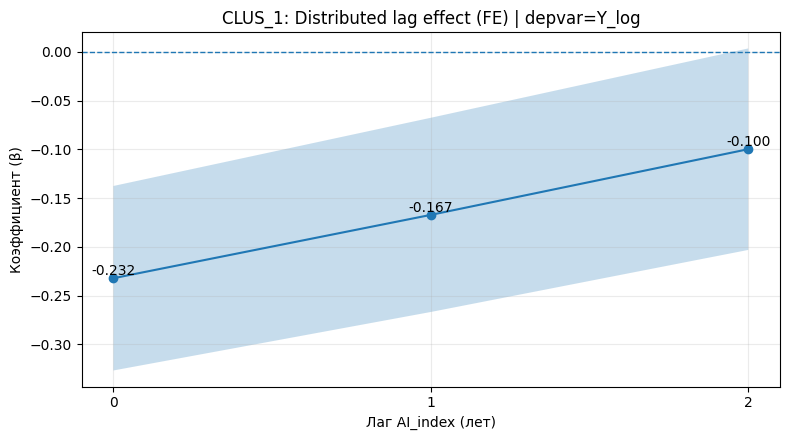


[CLUS_1] Distributed lags TWFE (0..2) | depvar = Y_log
                          PanelOLS Estimation Summary                           
Dep. Variable:                  Y_log   R-squared:                        0.2218
Estimator:                   PanelOLS   R-squared (Between):             -0.0661
No. Observations:                 119   R-squared (Within):              -0.4653
Date:                Tue, Jan 20 2026   R-squared (Overall):             -0.0662
Time:                        17:11:56   Log-likelihood                    179.51
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.2746
Entities:                          17   P-value                           0.0008
Avg Obs:                       7.0000   Distribution:                    F(6,90)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (

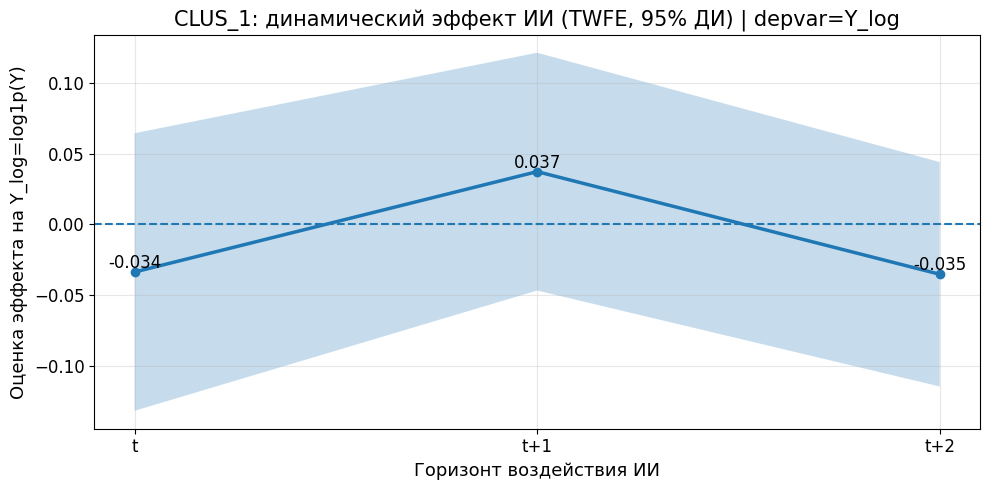


[CLUS_1] Random Effects (RE) | depvar = Y_log
                        RandomEffects Estimation Summary                        
Dep. Variable:                  Y_log   R-squared:                        0.8401
Estimator:              RandomEffects   R-squared (Between):              0.9632
No. Observations:                 153   R-squared (Within):              -0.9038
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.9626
Time:                        17:11:57   Log-likelihood                   -86.567
Cov. Estimator:                Robust                                           
                                        F-statistic:                      195.72
Entities:                          17   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(4,149)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust): 

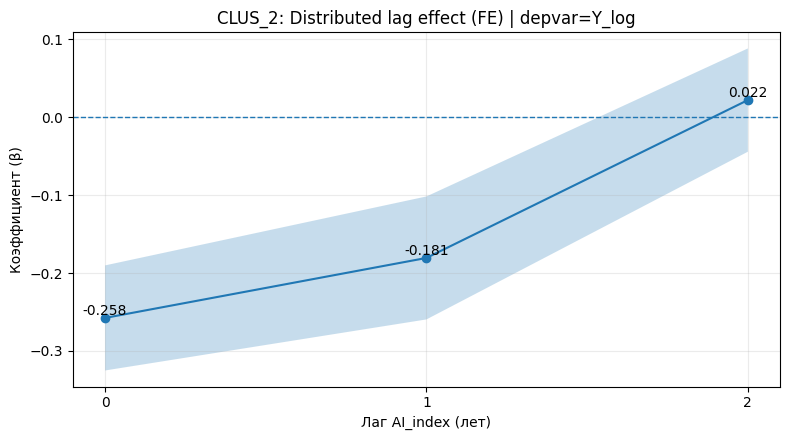


[CLUS_2] Distributed lags TWFE (0..2) | depvar = Y_log
                          PanelOLS Estimation Summary                           
Dep. Variable:                  Y_log   R-squared:                        0.1486
Estimator:                   PanelOLS   R-squared (Between):              0.0552
No. Observations:                 294   R-squared (Within):               0.1493
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0553
Time:                        17:11:59   Log-likelihood                    396.05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.9833
Entities:                          42   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(6,240)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (

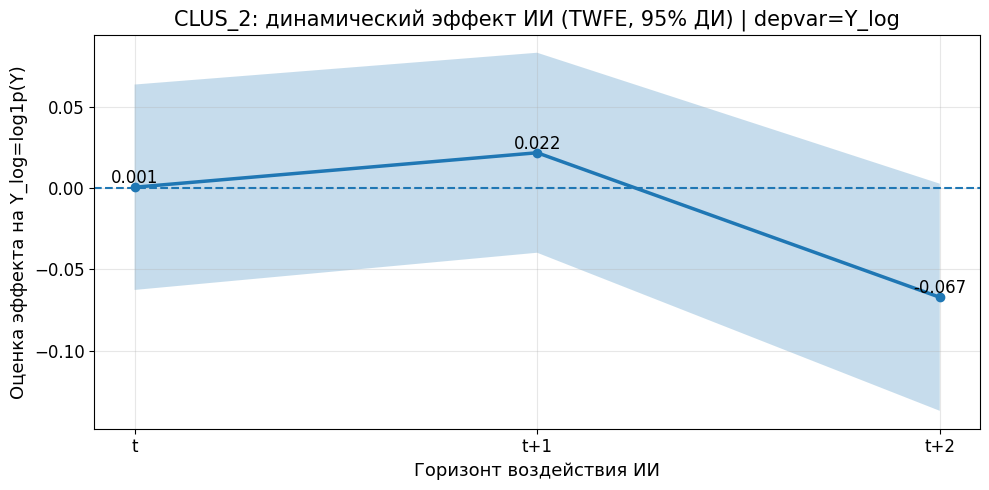


[CLUS_2] Random Effects (RE) | depvar = Y_log
                        RandomEffects Estimation Summary                        
Dep. Variable:                  Y_log   R-squared:                        0.1707
Estimator:              RandomEffects   R-squared (Between):             -0.0019
No. Observations:                 378   R-squared (Within):               0.5386
Date:                Tue, Jan 20 2026   R-squared (Overall):             -0.0017
Time:                        17:12:00   Log-likelihood                   -204.39
Cov. Estimator:                Robust                                           
                                        F-statistic:                      19.249
Entities:                          42   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(4,374)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust): 

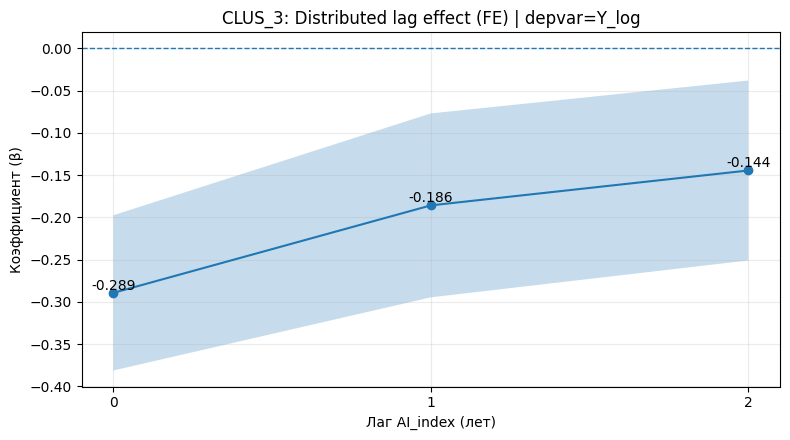


[CLUS_3] Distributed lags TWFE (0..2) | depvar = Y_log
                          PanelOLS Estimation Summary                           
Dep. Variable:                  Y_log   R-squared:                        0.0618
Estimator:                   PanelOLS   R-squared (Between):              0.0225
No. Observations:                 167   R-squared (Within):              -0.0844
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.0225
Time:                        17:12:03   Log-likelihood                    216.23
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.4375
Entities:                          24   P-value                           0.2051
Avg Obs:                       6.9583   Distribution:                   F(6,131)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (

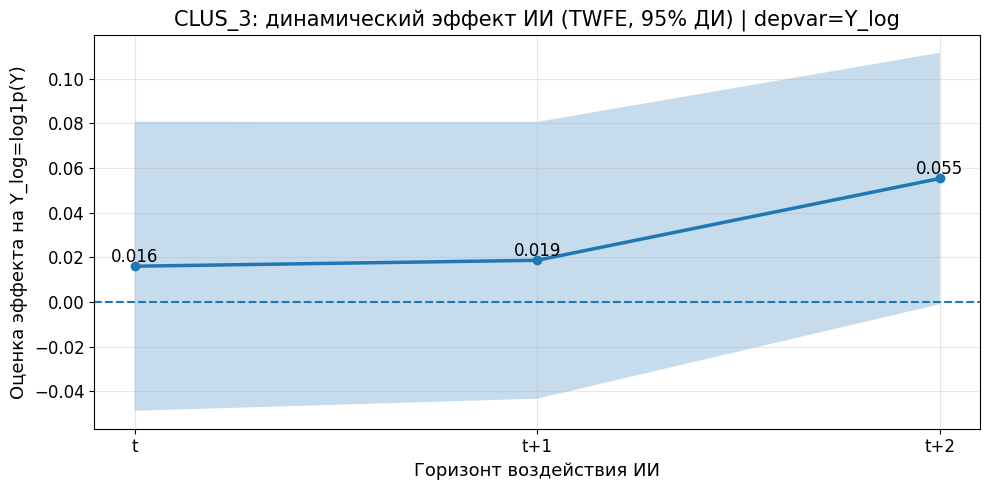


[CLUS_3] Random Effects (RE) | depvar = Y_log
                        RandomEffects Estimation Summary                        
Dep. Variable:                  Y_log   R-squared:                        0.2404
Estimator:              RandomEffects   R-squared (Between):              0.1866
No. Observations:                 215   R-squared (Within):               0.3308
Date:                Tue, Jan 20 2026   R-squared (Overall):              0.1872
Time:                        17:12:03   Log-likelihood                   -107.99
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.691
Entities:                          24   P-value                           0.0000
Avg Obs:                       8.9583   Distribution:                   F(4,211)
Min Obs:                       8.0000                                           
Max Obs:                       9.0000   F-statistic (robust): 

In [25]:
# -*- coding: utf-8 -*-
# CLUS_1 / CLUS_2 / CLUS_3
# Модель: Y_log = log1p(Y) = f(AI_index_eqw, investment, capital, unemp)
#
# Для каждого кластера код делает:
# 1) готовит данные + log1p для зависимой Y и части контролей
# 2) строит индекс AI_index_eqw (equal-weight по z-score компонент)
# 3) Pooled OLS (statsmodels) с робастными SE (HC3)
# 4) Pooled PanelOLS (linearmodels) с robust SE
# 5) FE (Entity fixed effects) + сравнение Pooled vs FE (F-test по SSR)
# 6) TWFE (Entity + Time fixed effects) + сравнение FE vs TWFE (F-test по SSR)
# 7) FE с одиночными лагами AI (0..7)
# 8) Distributed lags FE (0..2) + сумма эффектов + график
# 9) Distributed lags TWFE (0..2) + график
# 10) RE (Random Effects) + Hausman FE vs RE
# 11) RE + time dummies (RE_time) + Hausman TWFE vs RE_time (по базовым регрессорам)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sps

from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects


# -----------------------
# ФАЙЛЫ КЛАСТЕРОВ
# -----------------------
cluster_files = {
    "CLUS_1": "clus_1.xlsx",
    "CLUS_2": "clus_2.xlsx",
    "CLUS_3": "clus_3.xlsx",
}

# Эти переменные (если есть в файлах) логарифмируем через log1p
LOG1P_CONTROLS = ["personal", "expenditure", "investment", "capital"]


# -----------------------
# ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
# -----------------------
def to_numeric_clean(s: pd.Series) -> pd.Series:
    """Преобразование вида '1 234,5' -> 1234.5"""
    return pd.to_numeric(
        s.astype(str)
         .str.replace(" ", "", regex=False)
         .str.replace(",", ".", regex=False),
        errors="coerce"
    )


def add_ai_index_eqw(df: pd.DataFrame) -> pd.DataFrame:
    """
    Строит AI_index_eqw (equal-weight по z-score):
    компоненты:
      - personal_per_emp = personal / employment
      - expend_per_emp   = expenditure / employment
      - advtech_per_emp  = advanced_technologies / employment
      - pc_usage_share
      - internet_usage_share
      - higher_education_share
    Далее:
      1) для per_emp компонент: log1p
      2) стандартизация (z-score) всех компонент
      3) AI_index_eqw = среднее z-score по компонентам
    """
    df = df.copy()

    # Если индекс уже есть и не пустой — не пересчитываем
    if "AI_index_eqw" in df.columns and df["AI_index_eqw"].notna().any():
        return df

    need = [
        "personal", "expenditure", "advanced_technologies", "employment",
        "pc_usage_share", "internet_usage_share", "higher_education_share"
    ]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise ValueError(f"Нет колонок для расчёта AI_index_eqw: {missing}")

    df_idx = df.copy()

    # чистим и приводим к числам
    for c in need:
        df_idx[c] = to_numeric_clean(df_idx[c])

    # деление на 0 недопустимо
    df_idx.loc[df_idx["employment"] == 0, "employment"] = np.nan

    df_idx["personal_per_emp"] = df_idx["personal"] / df_idx["employment"]
    df_idx["expend_per_emp"]   = df_idx["expenditure"] / df_idx["employment"]
    df_idx["advtech_per_emp"]  = df_idx["advanced_technologies"] / df_idx["employment"]

    ai_vars = [
        "personal_per_emp",
        "expend_per_emp",
        "advtech_per_emp",
        "pc_usage_share",
        "internet_usage_share",
        "higher_education_share",
    ]

    # log1p на интенсивности
    for c in ["personal_per_emp", "expend_per_emp", "advtech_per_emp"]:
        df_idx[c] = np.log1p(df_idx[c])

    tmp = df_idx[["region", "year"] + ai_vars].dropna().copy()
    Z = StandardScaler().fit_transform(tmp[ai_vars])
    tmp["AI_index_eqw"] = Z.mean(axis=1)

    df = df.merge(tmp[["region", "year", "AI_index_eqw"]],
                  on=["region", "year"], how="left")
    return df


def f_test_nested_by_ssr(ssr_restricted, ssr_unrestricted, n, k_unrestricted, q):
    """
    F = ((SSR_r - SSR_ur)/q) / (SSR_ur/(n - k_ur))
    q = число ограничений (разница в числе параметров)
    """
    F = ((ssr_restricted - ssr_unrestricted) / q) / (ssr_unrestricted / (n - k_unrestricted))
    p = 1 - sps.f.cdf(F, q, n - k_unrestricted)
    return float(F), float(p)


def hausman_test(params_A, cov_A, params_B, cov_B, common_names):
    """
    Hausman: (bA-bB)' [Var(bA)-Var(bB)]^{-1} (bA-bB)
    Важно: при robust/clustered ковариациях матрица может быть вырожденной.
    """
    bA = params_A[common_names].values
    bB = params_B[common_names].values
    V  = (cov_A.loc[common_names, common_names] - cov_B.loc[common_names, common_names]).values

    diff = bA - bB
    stat = float(diff.T @ np.linalg.inv(V) @ diff)
    df   = int(len(common_names))
    p    = float(1 - sps.chi2.cdf(stat, df))
    return stat, df, p


def run_cluster(path_xlsx: str, cluster_name: str):
    print("\n" + "=" * 110)
    print(f"RUN: {cluster_name} | file={path_xlsx}")
    print("=" * 110)

    # -----------------------
    # 0) Загрузка
    # -----------------------
    df = pd.read_excel(path_xlsx)
    df["region"] = df["region"].astype(str).str.strip()
    df["year"] = pd.to_numeric(df["year"], errors="coerce")

    # -----------------------
    # 1) Зависимая: Y_log = log1p(Y)
    #    (Ровно как ты попросил)
    # -----------------------
    df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
    df["Y_log"] = np.log1p(df["Y"])

    for col in LOG1P_CONTROLS:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
            df[col] = np.log1p(df[col])

    # -----------------------
    # 2) Индекс AI
    # -----------------------
    df = add_ai_index_eqw(df)

    # -----------------------
    # 3) Выбор переменных модели
    # -----------------------
    vars_model = ["Y_log", "AI_index_eqw", "investment", "capital", "unemp"]
    df_use = df[["region", "year"] + vars_model].dropna().copy()

    # -----------------------
    # (A) Pooled OLS (statsmodels) HC3
    # -----------------------
    y_ols = df_use["Y_log"]
    X_ols = sm.add_constant(df_use[["AI_index_eqw", "investment", "capital", "unemp"]])
    res_ols = sm.OLS(y_ols, X_ols).fit(cov_type="HC3")
    print(f"\n[{cluster_name}] POOLED OLS (HC3) | depvar = Y_log")
    print(res_ols.summary())

    # -----------------------
    # Panel-индекс
    # -----------------------
    df_panel = df_use.set_index(["region", "year"]).sort_index()
    y = df_panel["Y_log"]
    X = df_panel[["AI_index_eqw", "investment", "capital", "unemp"]]

    # Кол-во регионов и периодов (без .nentity)
    n_entities = df_panel.index.get_level_values(0).nunique()
    n_periods  = df_panel.index.get_level_values(1).nunique()

    # -----------------------
    # (B) Pooled PanelOLS (robust)
    # -----------------------
    res_pooled = PanelOLS(y, X, entity_effects=False, time_effects=False).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Pooled (PanelOLS robust) | depvar = Y_log")
    print(res_pooled.summary)

    # -----------------------
    # (C) FE (Entity)
    # -----------------------
    res_fe = PanelOLS(y, X, entity_effects=True, time_effects=False).fit(cov_type="robust")
    print(f"\n[{cluster_name}] FE (Entity) | depvar = Y_log")
    print(res_fe.summary)

    # -----------------------
    # (D) Pooled vs FE: F-test по SSR (нужны ли FE регионов?)
    # -----------------------
    ssr_pooled = float(np.sum(np.asarray(res_pooled.resids) ** 2))
    ssr_fe     = float(np.sum(np.asarray(res_fe.resids) ** 2))

    n = int(res_fe.nobs)
    k_reg = X.shape[1]  # число регрессоров в X
    k_unrestricted = k_reg + (n_entities - 1)
    q = (n_entities - 1)

    F_pool, p_pool = f_test_nested_by_ssr(
        ssr_restricted=ssr_pooled,
        ssr_unrestricted=ssr_fe,
        n=n,
        k_unrestricted=k_unrestricted,
        q=q
    )

    print(f"\n[{cluster_name}] Pooled vs FE: F-test (нужны ли фикс. эффекты регионов?)")
    print("F-statistic:", F_pool)
    print("df1:", q, "df2:", n - k_unrestricted)
    print("p-value:", p_pool)

    # -----------------------
    # (E) TWFE (Entity + Time)
    # -----------------------
    res_twfe = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(
        cov_type="clustered", cluster_entity=True, cluster_time=True
    )
    print(f"\n[{cluster_name}] TWFE (Entity+Time) | depvar = Y_log")
    print(res_twfe.summary)

    # -----------------------
    # (F) FE vs TWFE: F-test по SSR (нужны ли year FE?)
    # -----------------------
    ssr_twfe = float(np.sum(np.asarray(res_twfe.resids) ** 2))
    k_unrestricted_twfe = k_reg + (n_entities - 1) + (n_periods - 1)
    q_time = (n_periods - 1)

    F_time, p_time = f_test_nested_by_ssr(
        ssr_restricted=ssr_fe,
        ssr_unrestricted=ssr_twfe,
        n=n,
        k_unrestricted=k_unrestricted_twfe,
        q=q_time
    )

    print(f"\n[{cluster_name}] FE vs TWFE: F-test (нужны ли year FE?)")
    print("F-statistic:", F_time)
    print("df1:", q_time, "df2:", n - k_unrestricted_twfe)
    print("p-value:", p_time)

    # -----------------------
    # (G) FE с одиночными лагами AI (0..7)
    # -----------------------
    base = df_panel.copy()
    print(f"\n[{cluster_name}] FE with single AI lag (0..7) | depvar = Y_log")
    fe_lags = {}

    for lag in range(0, 8):
        d = base.copy()
        d["AI_index_lag"] = d.groupby(level=0)["AI_index_eqw"].shift(lag) if lag > 0 else d["AI_index_eqw"]
        d = d.dropna(subset=["AI_index_lag"]).copy()

        y_l = d["Y_log"]
        X_l = d[["AI_index_lag", "investment", "capital", "unemp"]]

        try:
            res = PanelOLS(y_l, X_l, entity_effects=True).fit(cov_type="robust")
            fe_lags[lag] = res
            print(f"  lag={lag}: beta={float(res.params['AI_index_lag']):.4f}, "
                  f"p={float(res.pvalues['AI_index_lag']):.4g}, n={int(res.nobs)}")
        except Exception as e:
            print(f"  lag={lag}: не оценилось ({type(e).__name__})")

    # -----------------------
    # (H) Distributed lags FE (0..2) + сумма эффектов + график
    # -----------------------
    dld = base.copy()
    dld["AI_lag0"] = dld["AI_index_eqw"]
    dld["AI_lag1"] = dld.groupby(level=0)["AI_index_eqw"].shift(1)
    dld["AI_lag2"] = dld.groupby(level=0)["AI_index_eqw"].shift(2)
    dld = dld.dropna(subset=["AI_lag0", "AI_lag1", "AI_lag2"]).copy()

    y_dl = dld["Y_log"]
    X_dl = dld[["AI_lag0", "AI_lag1", "AI_lag2", "investment", "capital", "unemp"]]

    res_fe_dl = PanelOLS(y_dl, X_dl, entity_effects=True).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Distributed lags FE (0..2) | depvar = Y_log")
    print(res_fe_dl.summary)

    beta_sum = float(res_fe_dl.params["AI_lag0"] + res_fe_dl.params["AI_lag1"] + res_fe_dl.params["AI_lag2"])

    pn = list(res_fe_dl.params.index)
    a = np.zeros(len(pn))
    for nm in ["AI_lag0", "AI_lag1", "AI_lag2"]:
        a[pn.index(nm)] = 1.0

    se_sum = float(np.sqrt(a @ res_fe_dl.cov.values @ a))
    t_sum = beta_sum / se_sum
    p_sum = 2 * (1 - sps.t.cdf(abs(t_sum), df=int(res_fe_dl.df_resid)))

    print(f"\n[{cluster_name}] Суммарный эффект AI (β0+β1+β2): {beta_sum:.6f}")
    print(f"SE: {se_sum:.6f} | t: {float(t_sum):.3f} | p: {float(p_sum):.6g}")

    # график FE DL
    lags = [0, 1, 2]
    names = ["AI_lag0", "AI_lag1", "AI_lag2"]
    betas = np.array([float(res_fe_dl.params[n]) for n in names], dtype=float)
    ses = np.sqrt(np.array([float(res_fe_dl.cov.loc[n, n]) for n in names], dtype=float))

    z = 1.96
    lower, upper = betas - z * ses, betas + z * ses

    plt.figure(figsize=(8, 4.5))
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.plot(lags, betas, marker="o")
    plt.fill_between(lags, lower, upper, alpha=0.25)
    for x_, yv in zip(lags, betas):
        plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom")
    plt.title(f"{cluster_name}: Distributed lag effect (FE) | depvar=Y_log")
    plt.xlabel("Лаг AI_index (лет)")
    plt.ylabel("Коэффициент (β)")
    plt.xticks(lags)
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    # -----------------------
    # (I) Distributed lags TWFE (0..2) + график
    # -----------------------
    res_twfe_dl = PanelOLS(y_dl, X_dl, entity_effects=True, time_effects=True).fit(
        cov_type="clustered", cluster_entity=True, cluster_time=True
    )
    print(f"\n[{cluster_name}] Distributed lags TWFE (0..2) | depvar = Y_log")
    print(res_twfe_dl.summary)

    betas_tw = np.array([float(res_twfe_dl.params[n]) for n in names], dtype=float)
    ses_tw = np.sqrt(np.array([float(res_twfe_dl.cov.loc[n, n]) for n in names], dtype=float))
    lower_tw, upper_tw = betas_tw - z * ses_tw, betas_tw + z * ses_tw

    plt.figure(figsize=(10, 5))
    plt.axhline(0, linestyle="--", linewidth=1.5)
    plt.plot(lags, betas_tw, marker="o", linewidth=2.5)
    plt.fill_between(lags, lower_tw, upper_tw, alpha=0.25)
    for x_, yv in zip(lags, betas_tw):
        plt.text(x_, yv, f"{yv:.3f}", ha="center", va="bottom", fontsize=12)

    plt.xticks(lags, ["t", "t+1", "t+2"], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Горизонт воздействия ИИ", fontsize=13)
    plt.ylabel("Оценка эффекта на Y_log=log1p(Y)", fontsize=13)
    plt.title(f"{cluster_name}: динамический эффект ИИ (TWFE, 95% ДИ) | depvar=Y_log", fontsize=15)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # -----------------------
    # (J) RE + Hausman (FE vs RE)
    # -----------------------
    res_re = RandomEffects(y, X).fit(cov_type="robust")
    print(f"\n[{cluster_name}] Random Effects (RE) | depvar = Y_log")
    print(res_re.summary)

    common = list(res_fe.params.index.intersection(res_re.params.index))
    print(f"\n[{cluster_name}] Hausman: FE vs RE (по общим регрессорам)")
    try:
        stat_h, df_h, p_h = hausman_test(res_fe.params, res_fe.cov, res_re.params, res_re.cov, common)
        print("Hausman statistic:", stat_h)
        print("df:", df_h)
        print("p-value:", p_h)
    except Exception as e:
        print("Hausman не посчитался (часто при robust/вырожденной матрице):", type(e).__name__)

    # -----------------------
    # (K) RE + time dummies (RE_time) + Hausman TWFE vs RE_time
    # -----------------------
    years = df_use["year"].dropna().astype(int)
    year_dum = pd.get_dummies(years, prefix="year", drop_first=True)
    year_dum.index = df_use.index

    df_re_time = df_use.join(year_dum)
    df_re_time = df_re_time.set_index(["region", "year"]).sort_index()

    y_rt = df_re_time["Y_log"]
    X_rt = df_re_time[["AI_index_eqw", "investment", "capital", "unemp"] + list(year_dum.columns)]

    res_re_time = RandomEffects(y_rt, X_rt).fit(cov_type="robust")
    print(f"\n[{cluster_name}] RE + Time dummies (RE_time) | depvar = Y_log")
    print(res_re_time.summary)

    base_regs = ["AI_index_eqw", "investment", "capital", "unemp"]
    common2 = [v for v in base_regs if v in res_twfe.params.index and v in res_re_time.params.index]

    print(f"\n[{cluster_name}] Hausman: TWFE vs RE_time (по основным регрессорам)")
    try:
        stat2, df2, p2 = hausman_test(res_twfe.params, res_twfe.cov, res_re_time.params, res_re_time.cov, common2)
        print("Hausman statistic:", stat2)
        print("df:", df2)
        print("p-value:", p2)
    except Exception as e:
        print("Hausman не посчитался (часто при clustered/robust):", type(e).__name__)

    return {
        "ols": res_ols,
        "pooled_panel": res_pooled,
        "fe": res_fe,
        "twfe": res_twfe,
        "pooled_vs_fe": {"F": F_pool, "p": p_pool},
        "fe_vs_twfe": {"F": F_time, "p": p_time},
        "fe_lags": fe_lags,
        "fe_dl": res_fe_dl,
        "twfe_dl": res_twfe_dl,
        "re": res_re,
        "re_time": res_re_time,
    }


# -----------------------
# ЗАПУСК ДЛЯ ВСЕХ КЛАСТЕРОВ
# -----------------------
all_results = {}
for cname, fpath in cluster_files.items():
    all_results[cname] = run_cluster(fpath, cname)

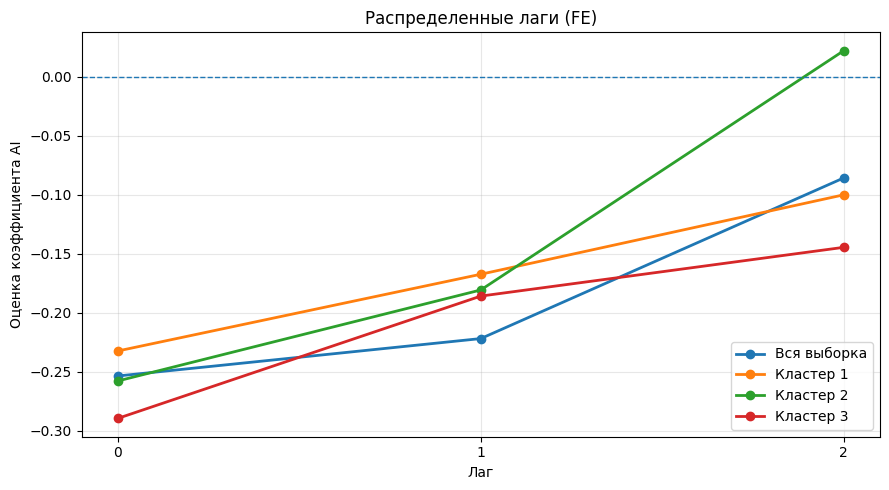

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Лаги
lags = [0, 1, 2]

# Коэффициенты AI (FE, Y_log)
data = {
    "Вся выборка": [-0.2534, -0.2217, -0.0856],
    "Кластер 1":   [-0.2322, -0.1672, -0.0999],
    "Кластер 2":   [-0.2576, -0.1805,  0.0222],
    "Кластер 3":   [-0.2893, -0.1857, -0.1444],
}

df = pd.DataFrame(data, index=lags)

# Построение графика
plt.figure(figsize=(9, 5))

for col in df.columns:
    plt.plot(df.index, df[col], marker="o", linewidth=2, label=col)

plt.axhline(0, linestyle="--", linewidth=1)  # линия нуля
plt.xticks(lags)
plt.xlabel("Лаг")
plt.ylabel("Оценка коэффициента AI")
plt.title("Распределенные лаги (FE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

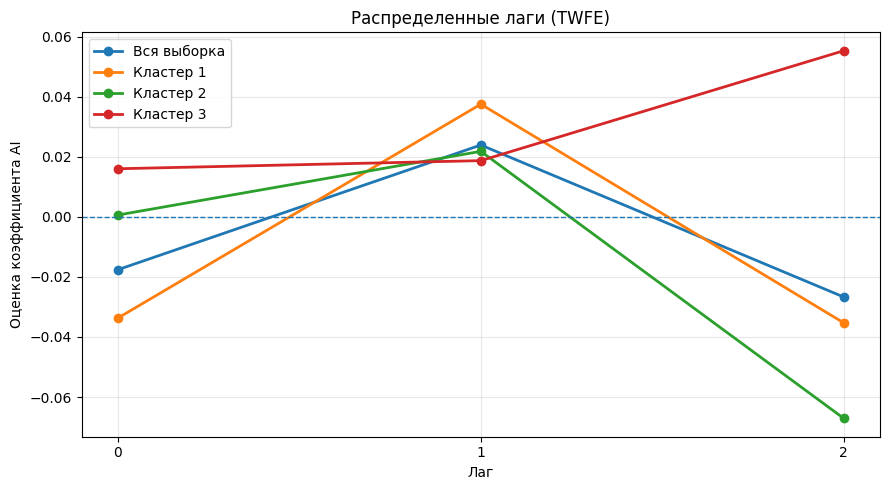

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Лаги
lags = [0, 1, 2]

# Коэффициенты AI (TWFE, depvar = Y_log)
data = {
    "Вся выборка": [-0.0176,  0.0239, -0.0267],
    "Кластер 1":   [-0.0337,  0.0375, -0.0353],
    "Кластер 2":   [ 0.0006,  0.0218, -0.0671],
    "Кластер 3":   [ 0.0160,  0.0187,  0.0553],
}

df = pd.DataFrame(data, index=lags)

# Построение графика
plt.figure(figsize=(9, 5))

for col in df.columns:
    plt.plot(df.index, df[col], marker="o", linewidth=2, label=col)

plt.axhline(0, linestyle="--", linewidth=1)
plt.xticks(lags)
plt.xlabel("Лаг")
plt.ylabel("Оценка коэффициента AI")
plt.title("Распределенные лаги (TWFE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()